In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 日本語フォント設定（必要に応じて）
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)

# データ読み込み
df = pd.read_csv(r'C:\Users\tetsu\dev\energy-env\data\exploration\power_analysis.csv')

print(f"データ形状: {df.shape}")
print(f"期間: {df['date'].min()} ～ {df['date'].max()}")
print("\n基本情報:")
df.info()

データ形状: (197856, 11)
期間: 2023-01-01 ～ 2025-07-04

基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197856 entries, 0 to 197855
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  197856 non-null  object 
 1   hour                  197856 non-null  int64  
 2   month                 197856 non-null  int64  
 3   actual_power          197856 non-null  int64  
 4   temperature_2m        197856 non-null  float64
 5   relative_humidity_2m  197856 non-null  int64  
 6   precipitation         197856 non-null  float64
 7   weather_code          197856 non-null  int64  
 8   day_of_week           197856 non-null  object 
 9   is_weekend            197856 non-null  bool   
 10  is_holiday            197856 non-null  bool   
dtypes: bool(2), float64(2), int64(5), object(2)
memory usage: 14.0+ MB


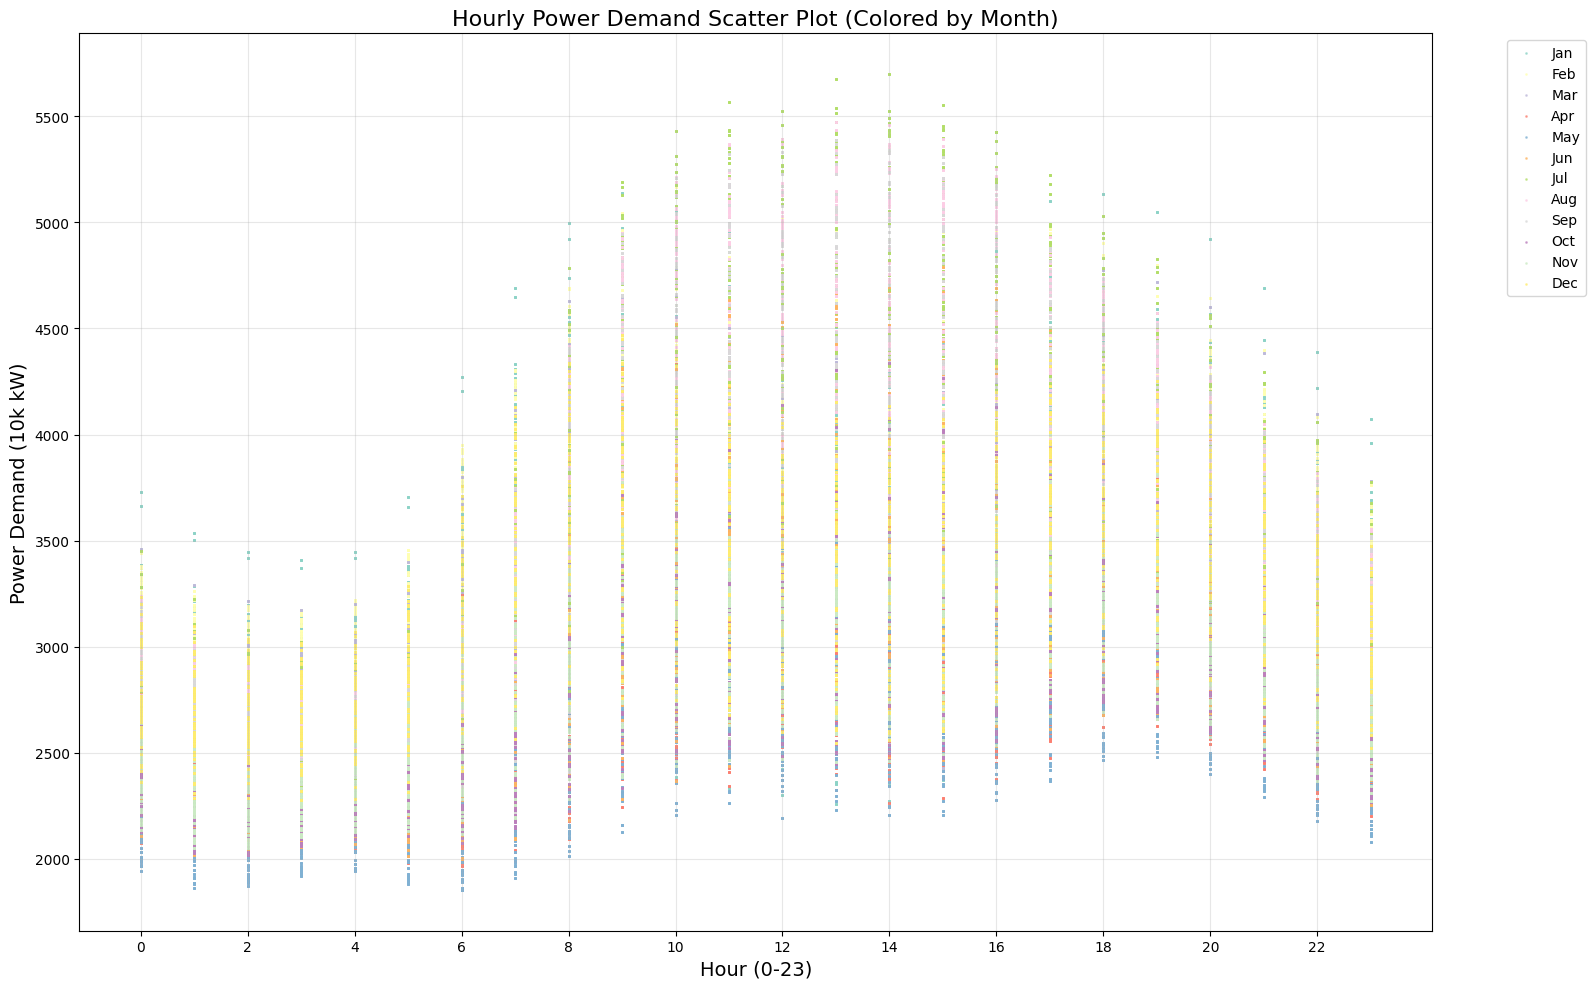

In [6]:
# 時間x電力の散布図（月別色分け）- 修正版
plt.figure(figsize=(16, 10))

# 月別に色を設定（正しいカラーマップ名）
colors = plt.cm.Set3(np.linspace(0, 1, 12))  # tab12 → Set3 に修正
# または plt.cm.tab10 を使って10色で循環
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 各月のデータを散布図で表示
for month in range(1, 13):
    month_data = df[df['month'] == month]
    plt.scatter(month_data['hour'], month_data['actual_power'], 
               c=[colors[month-1]], alpha=0.6, s=1, 
               label=f'{month_names[month-1]}')

plt.xlabel('Hour (0-23)', fontsize=14)
plt.ylabel('Power Demand (10k kW)', fontsize=14)
plt.title('Hourly Power Demand Scatter Plot (Colored by Month)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))

# レイアウト調整
plt.tight_layout()
plt.show()

表示対象月: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


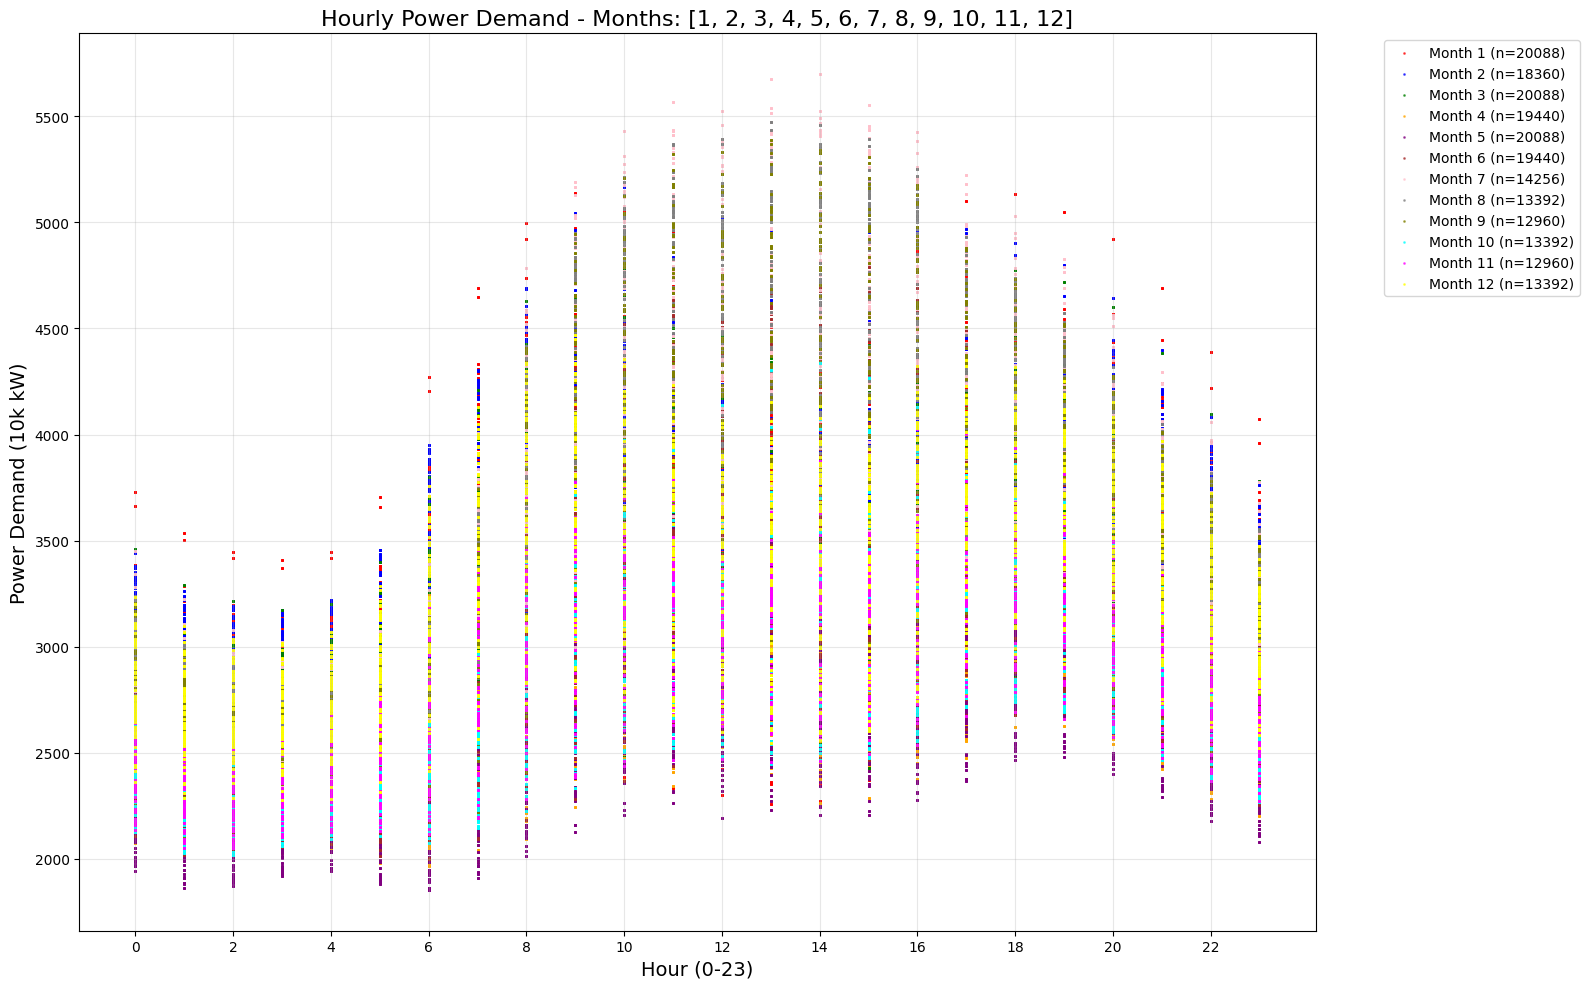


=== 選択月の統計情報 ===
データ数: 197,856 レコード
需要範囲: 1853 - 5699 万kW
平均需要: 3171 万kW

=== 月別詳細統計 ===
Month  1 (    red): 3506±574 万kW [2229-5137] (n=20088)
Month  2 (   blue): 3504±537 万kW [2311-5179] (n=18360)
Month  3 (  green): 3090±520 万kW [2086-4837] (n=20088)
Month  4 ( orange): 2701±398 万kW [1948-4339] (n=19440)
Month  5 ( purple): 2619±418 万kW [1853-3805] (n=20088)
Month  6 (  brown): 3006±625 万kW [2000-4812] (n=19440)
Month  7 (   pink): 3715±868 万kW [2240-5699] (n=14256)
Month  8 (   gray): 3774±823 万kW [2400-5475] (n=13392)
Month  9 (  olive): 3465±804 万kW [2064-5390] (n=12960)
Month 10 (   cyan): 2780±458 万kW [2016-4335] (n=13392)
Month 11 (magenta): 2880±423 万kW [2051-4024] (n=12960)
Month 12 ( yellow): 3289±490 万kW [2279-4469] (n=13392)


In [7]:
# 月の配列定義（簡単に変更可能）
selected_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # 全月表示
# selected_months = [1, 2, 12]      # 冬季のみ
# selected_months = [6, 7, 8]       # 夏季のみ
# selected_months = [3, 4, 5, 9, 10, 11]  # 春秋のみ

print(f"表示対象月: {selected_months}")

# 月と色の固定マッピング（1月=赤、2月=青、...12月=黄色で常に固定）
month_color_map = {
    1: 'red',      2: 'blue',     3: 'green',    4: 'orange',
    5: 'purple',   6: 'brown',    7: 'pink',     8: 'gray',
    9: 'olive',    10: 'cyan',    11: 'magenta', 12: 'yellow'
}

# 時間x電力の散布図（選択月のみ、色固定）
plt.figure(figsize=(16, 10))

# 選択された月のデータのみを散布図で表示（色は常に同じ月=同じ色）
for month in selected_months:
    month_data = df[df['month'] == month]
    data_count = len(month_data)
    plt.scatter(month_data['hour'], month_data['actual_power'], 
               c=month_color_map[month], alpha=0.6, s=1, 
               label=f'Month {month} (n={data_count})')

plt.xlabel('Hour (0-23)', fontsize=14)
plt.ylabel('Power Demand (10k kW)', fontsize=14)
plt.title(f'Hourly Power Demand - Months: {selected_months}', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

# 選択月の統計情報
selected_data = df[df['month'].isin(selected_months)]
print(f"\n=== 選択月の統計情報 ===")
print(f"データ数: {len(selected_data):,} レコード")
print(f"需要範囲: {selected_data['actual_power'].min():.0f} - {selected_data['actual_power'].max():.0f} 万kW")
print(f"平均需要: {selected_data['actual_power'].mean():.0f} 万kW")

# 月別詳細統計
print(f"\n=== 月別詳細統計 ===")
for month in selected_months:
    month_data = df[df['month'] == month]['actual_power']
    color = month_color_map[month]
    print(f"Month {month:2d} ({color:>7}): {month_data.mean():.0f}±{month_data.std():.0f} 万kW "
          f"[{month_data.min():.0f}-{month_data.max():.0f}] (n={len(month_data)})")

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

# 月と色の固定マッピング
month_color_map = {
    1: 'red',      2: 'blue',     3: 'green',    4: 'orange',
    5: 'purple',   6: 'brown',    7: 'pink',     8: 'gray',
    9: 'olive',    10: 'cyan',    11: 'magenta', 12: 'yellow'
}

# PDFファイル作成
with PdfPages('monthly_power_demand_individual.pdf') as pdf:
    
    # 各月の個別フィギュア作成
    for month in range(1, 13):
        month_data = df[df['month'] == month]
        
        if len(month_data) == 0:
            print(f"Month {month}: No data available")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # その月のデータのみ散布図
        ax.scatter(month_data['hour'], month_data['actual_power'], 
                   c=month_color_map[month], alpha=0.7, s=2)
        
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Month {month} - Hourly Power Demand Pattern\n'
                    f'Mean: {month_data["actual_power"].mean():.0f}±{month_data["actual_power"].std():.0f} kW '
                    f'(n={len(month_data):,})', fontsize=16)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸の範囲を統一（全月比較しやすく）
        ax.set_ylim(df['actual_power'].min() - 100, df['actual_power'].max() + 100)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ Month {month} 図をPDFに追加")

print(f"\n🎉 完了！12ヶ月の図を 'monthly_power_demand_individual.pdf' に保存しました")

✅ Month 1 図をPDFに追加
✅ Month 2 図をPDFに追加
✅ Month 3 図をPDFに追加
✅ Month 4 図をPDFに追加
✅ Month 5 図をPDFに追加
✅ Month 6 図をPDFに追加
✅ Month 7 図をPDFに追加
✅ Month 8 図をPDFに追加
✅ Month 9 図をPDFに追加
✅ Month 10 図をPDFに追加
✅ Month 11 図をPDFに追加
✅ Month 12 図をPDFに追加

🎉 完了！12ヶ月の図を 'monthly_power_demand_individual.pdf' に保存しました


In [1]:
# データ読み込み
df = pd.read_csv(r'C:\Users\tetsu\dev\energy-env\data\exploration\power_analysis.csv')

# 気温ランク作成
df['temp_rank'] = pd.cut(df['temperature_2m'], 
                        bins=[-30, 5, 15, 25, 30, 50], 
                        labels=['極寒(<5℃)', '寒い(5-15℃)', '快適(15-25℃)', 
                               '暑い(25-30℃)', '猛暑(>30℃)'])

print("気温ランク別データ数:")
print(df['temp_rank'].value_counts())

NameError: name 'pd' is not defined

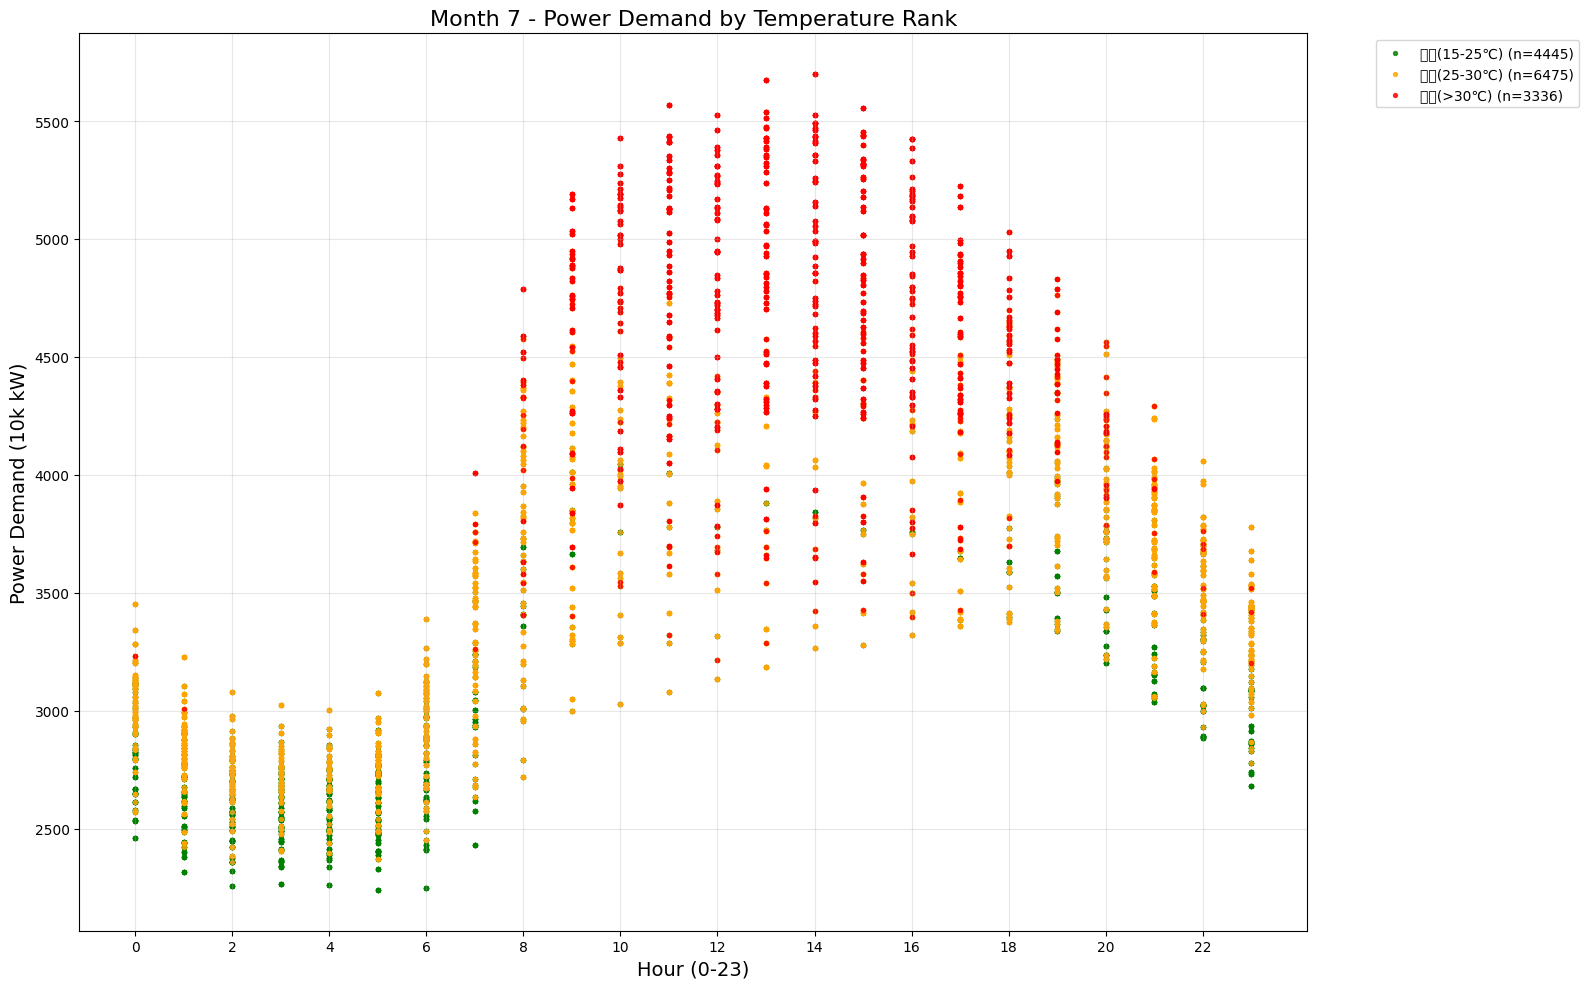


=== 7月の気温ランク別統計 ===
快適(15-25℃): 2942±467 万kW [2240-4899] (n=4445)
暑い(25-30℃): 3697±630 万kW [2360-5490] (n=6475)
  猛暑(>30℃): 4782±473 万kW [3006-5699] (n=3336)


In [5]:
# 7月データで気温による需要レンジの検証（改良版）
target_month = 7
month_data = df[df['month'] == target_month].copy()

# より区別しやすい色系統
temp_colors = {
    '極寒(<5℃)': 'navy',       # 濃い青
    '寒い(5-15℃)': 'blue',     # 青  
    '快適(15-25℃)': 'green',   # 緑
    '暑い(25-30℃)': 'orange',  # オレンジ
    '猛暑(>30℃)': 'red'        # 赤
}

plt.figure(figsize=(16, 10))

for temp_rank in ['極寒(<5℃)', '寒い(5-15℃)', '快適(15-25℃)', '暑い(25-30℃)', '猛暑(>30℃)']:
    temp_data = month_data[month_data['temp_rank'] == temp_rank]
    if len(temp_data) > 0:
        plt.scatter(temp_data['hour'], temp_data['actual_power'], 
                   c=temp_colors[temp_rank], alpha=0.8, s=8,  # マーカーサイズ 3→8
                   label=f'{temp_rank} (n={len(temp_data)})')

plt.xlabel('Hour (0-23)', fontsize=14)
plt.ylabel('Power Demand (10k kW)', fontsize=14)
plt.title(f'Month {target_month} - Power Demand by Temperature Rank', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

# 気温ランク別統計
print(f"\n=== {target_month}月の気温ランク別統計 ===")
for temp_rank in ['極寒(<5℃)', '寒い(5-15℃)', '快適(15-25℃)', '暑い(25-30℃)', '猛暑(>30℃)']:
    temp_data = month_data[month_data['temp_rank'] == temp_rank]['actual_power']
    if len(temp_data) > 0:
        print(f"{temp_rank:>10}: {temp_data.mean():.0f}±{temp_data.std():.0f} 万kW "
              f"[{temp_data.min():.0f}-{temp_data.max():.0f}] (n={len(temp_data)})")

In [6]:
from matplotlib.backends.backend_pdf import PdfPages

# 気温ランク別色マッピング（統一）
temp_colors = {
    '極寒(<5℃)': 'darkblue',   
    '寒い(5-15℃)': 'cyan',     
    '快適(15-25℃)': 'lime',    
    '暑い(25-30℃)': 'gold',    
    '猛暑(>30℃)': 'crimson'
}

# PDFファイル作成
with PdfPages('monthly_power_demand_by_temperature.pdf') as pdf:
    
    # 各月の気温ランク別散布図作成
    for month in range(1, 13):
        month_data = df[df['month'] == month].copy()
        
        if len(month_data) == 0:
            print(f"Month {month}: No data available")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(16, 10))
        
        # 気温ランク別散布図
        for temp_rank in ['極寒(<5℃)', '寒い(5-15℃)', '快適(15-25℃)', '暑い(25-30℃)', '猛暑(>30℃)']:
            temp_data = month_data[month_data['temp_rank'] == temp_rank]
            if len(temp_data) > 0:
                ax.scatter(temp_data['hour'], temp_data['actual_power'], 
                          c=temp_colors[temp_rank], alpha=0.8, s=8,
                          label=f'{temp_rank} (n={len(temp_data)})')
        
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Month {month} - Power Demand by Temperature Rank\n'
                    f'Total: {len(month_data):,} records', fontsize=16)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸の範囲を統一（全月比較しやすく）
        ax.set_ylim(df['actual_power'].min() - 100, df['actual_power'].max() + 100)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ Month {month} 気温ランク別散布図をPDFに追加")

print(f"\n🎉 完了！12ヶ月の気温ランク別散布図を 'monthly_power_demand_by_temperature.pdf' に保存しました")

✅ Month 1 気温ランク別散布図をPDFに追加
✅ Month 2 気温ランク別散布図をPDFに追加
✅ Month 3 気温ランク別散布図をPDFに追加
✅ Month 4 気温ランク別散布図をPDFに追加
✅ Month 5 気温ランク別散布図をPDFに追加
✅ Month 6 気温ランク別散布図をPDFに追加
✅ Month 7 気温ランク別散布図をPDFに追加
✅ Month 8 気温ランク別散布図をPDFに追加
✅ Month 9 気温ランク別散布図をPDFに追加
✅ Month 10 気温ランク別散布図をPDFに追加
✅ Month 11 気温ランク別散布図をPDFに追加
✅ Month 12 気温ランク別散布図をPDFに追加

🎉 完了！12ヶ月の気温ランク別散布図を 'monthly_power_demand_by_temperature.pdf' に保存しました


In [7]:
from matplotlib.backends.backend_pdf import PdfPages

# 細かい気温ランク作成（9段階）
df['temp_rank_fine'] = pd.cut(df['temperature_2m'], 
                             bins=[-50, 0, 5, 10, 15, 20, 25, 30, 35, 50], 
                             labels=['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35'])

# 気温ランク別データ数確認
print("細かい気温ランク別データ数:")
print(df['temp_rank_fine'].value_counts().sort_index())

# より区別しやすい9色設定
temp_colors_fine = {
    '≤0': 'navy',       # 濃紺
    '1-5': 'blue',      # 青
    '6-10': 'cyan',     # シアン
    '11-15': 'lightgreen', # 薄緑
    '16-20': 'lime',    # ライム
    '21-25': 'yellow',  # 黄色
    '26-30': 'orange',  # オレンジ
    '31-35': 'red',     # 赤
    '>35': 'darkred'    # 濃赤
}

# PDFファイル作成
with PdfPages('monthly_power_demand_by_fine_temperature.pdf') as pdf:
    
    # 各月の細かい気温ランク別散布図作成
    for month in range(1, 13):
        month_data = df[df['month'] == month].copy()
        
        if len(month_data) == 0:
            print(f"Month {month}: No data available")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(18, 10))
        
        # 細かい気温ランク別散布図
        for temp_rank in ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']:
            temp_data = month_data[month_data['temp_rank_fine'] == temp_rank]
            if len(temp_data) > 0:
                ax.scatter(temp_data['hour'], temp_data['actual_power'], 
                          c=temp_colors_fine[temp_rank], alpha=0.8, s=6,
                          label=f'{temp_rank}℃ (n={len(temp_data)})')
        
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Month {month} - Power Demand by Fine Temperature Rank\n'
                    f'Total: {len(month_data):,} records', fontsize=16)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸の範囲を統一（全月比較しやすく）
        ax.set_ylim(df['actual_power'].min() - 100, df['actual_power'].max() + 100)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ Month {month} 細かい気温ランク別散布図をPDFに追加")

print(f"\n🎉 完了！12ヶ月の細かい気温ランク別散布図を 'monthly_power_demand_by_fine_temperature.pdf' に保存しました")

細かい気温ランク別データ数:
temp_rank_fine
≤0        6587
1-5      23554
6-10     31932
11-15    32156
16-20    34563
21-25    34845
26-30    25201
31-35     8419
>35        599
Name: count, dtype: int64
✅ Month 1 細かい気温ランク別散布図をPDFに追加
✅ Month 2 細かい気温ランク別散布図をPDFに追加
✅ Month 3 細かい気温ランク別散布図をPDFに追加
✅ Month 4 細かい気温ランク別散布図をPDFに追加
✅ Month 5 細かい気温ランク別散布図をPDFに追加
✅ Month 6 細かい気温ランク別散布図をPDFに追加
✅ Month 7 細かい気温ランク別散布図をPDFに追加
✅ Month 8 細かい気温ランク別散布図をPDFに追加
✅ Month 9 細かい気温ランク別散布図をPDFに追加
✅ Month 10 細かい気温ランク別散布図をPDFに追加
✅ Month 11 細かい気温ランク別散布図をPDFに追加
✅ Month 12 細かい気温ランク別散布図をPDFに追加

🎉 完了！12ヶ月の細かい気温ランク別散布図を 'monthly_power_demand_by_fine_temperature.pdf' に保存しました


In [7]:
from matplotlib.backends.backend_pdf import PdfPages

# 細かい気温ランク作成（9段階）
df['temp_rank_fine'] = pd.cut(df['temperature_2m'], 
                             bins=[-50, 0, 5, 10, 15, 20, 25, 30, 35, 50], 
                             labels=['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35'])

# 気温ランク別データ数確認
print("細かい気温ランク別データ数:")
print(df['temp_rank_fine'].value_counts().sort_index())

# より区別しやすい9色設定
temp_colors_fine = {
    '≤0': 'navy',       # 濃紺
    '1-5': 'blue',      # 青
    '6-10': 'cyan',     # シアン
    '11-15': 'lightgreen', # 薄緑
    '16-20': 'lime',    # ライム
    '21-25': 'yellow',  # 黄色
    '26-30': 'orange',  # オレンジ
    '31-35': 'red',     # 赤
    '>35': 'darkred'    # 濃赤
}

# PDFファイル作成
with PdfPages('monthly_power_demand_by_fine_temperature.pdf') as pdf:
    
    # 各月の細かい気温ランク別散布図作成
    for month in range(1, 13):
        month_data = df[df['month'] == month].copy()
        
        if len(month_data) == 0:
            print(f"Month {month}: No data available")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(18, 10))
        
        # 細かい気温ランク別散布図
        for temp_rank in ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']:
            temp_data = month_data[month_data['temp_rank_fine'] == temp_rank]
            if len(temp_data) > 0:
                ax.scatter(temp_data['hour'], temp_data['actual_power'], 
                          c=temp_colors_fine[temp_rank], alpha=0.8, s=6,
                          label=f'{temp_rank}℃ (n={len(temp_data)})')
        
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Month {month} - Power Demand by Fine Temperature Rank\n'
                    f'Total: {len(month_data):,} records', fontsize=16)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸の範囲を統一（全月比較しやすく）
        ax.set_ylim(df['actual_power'].min() - 100, df['actual_power'].max() + 100)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ Month {month} 細かい気温ランク別散布図をPDFに追加")

print(f"\n🎉 完了！12ヶ月の細かい気温ランク別散布図を 'monthly_power_demand_by_fine_temperature.pdf' に保存しました")

細かい気温ランク別データ数:
temp_rank_fine
≤0        6587
1-5      23554
6-10     31932
11-15    32156
16-20    34563
21-25    34845
26-30    25201
31-35     8419
>35        599
Name: count, dtype: int64
✅ Month 1 細かい気温ランク別散布図をPDFに追加
✅ Month 2 細かい気温ランク別散布図をPDFに追加
✅ Month 3 細かい気温ランク別散布図をPDFに追加
✅ Month 4 細かい気温ランク別散布図をPDFに追加
✅ Month 5 細かい気温ランク別散布図をPDFに追加
✅ Month 6 細かい気温ランク別散布図をPDFに追加
✅ Month 7 細かい気温ランク別散布図をPDFに追加
✅ Month 8 細かい気温ランク別散布図をPDFに追加
✅ Month 9 細かい気温ランク別散布図をPDFに追加
✅ Month 10 細かい気温ランク別散布図をPDFに追加
✅ Month 11 細かい気温ランク別散布図をPDFに追加
✅ Month 12 細かい気温ランク別散布図をPDFに追加

🎉 完了！12ヶ月の細かい気温ランク別散布図を 'monthly_power_demand_by_fine_temperature.pdf' に保存しました


In [10]:
# 気温ランク別フィギュア作成（純粋散布図のみ）

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# 気温ランク色設定
temp_colors_fine = {
    '≤0': 'navy',       # 濃紺
    '1-5': 'blue',      # 青
    '6-10': 'cyan',     # シアン
    '11-15': 'lightgreen', # 薄緑
    '16-20': 'lime',    # ライム
    '21-25': 'yellow',  # 黄色
    '26-30': 'orange',  # オレンジ
    '31-35': 'red',     # 赤
    '>35': 'darkred'    # 濃赤
}

# 気温ランク順序（データ数順ではなく温度順）
temp_ranks_ordered = ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']

print("🔄 気温ランク別散布図作成開始...")

# PDFファイル作成
with PdfPages('power_demand_by_temperature_ranks.pdf') as pdf:
    
    # 各気温ランク別にフィギュア作成
    for temp_rank in temp_ranks_ordered:
        # 該当気温ランクのデータを抽出
        temp_data = df[df['temp_rank_fine'] == temp_rank].copy()
        
        if len(temp_data) == 0:
            print(f"⚠️  {temp_rank}℃: データなし")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(18, 10))
        
        # 散布図のみ作成
        ax.scatter(temp_data['hour'], temp_data['actual_power'], 
                  c=temp_colors_fine[temp_rank], alpha=0.6, s=8)
        
        # グラフ設定
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Power Demand Pattern: {temp_rank}℃ Range\n'
                    f'Total: {len(temp_data):,} records', fontsize=16)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸を該当気温ランクに最適化
        y_margin = (temp_data['actual_power'].max() - temp_data['actual_power'].min()) * 0.05
        y_min = temp_data['actual_power'].min() - y_margin
        y_max = temp_data['actual_power'].max() + y_margin
        ax.set_ylim(y_min, y_max)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ {temp_rank}℃: {len(temp_data):,}件の散布図作成完了")

print(f"\n🎉 完了！気温ランク別散布図を 'power_demand_by_temperature_ranks.pdf' に保存しました")
print(f"📊 純粋な分布パターンを図として確認してください")

🔄 気温ランク別散布図作成開始...
✅ ≤0℃: 6,587件の散布図作成完了
✅ 1-5℃: 23,554件の散布図作成完了
✅ 6-10℃: 31,932件の散布図作成完了
✅ 11-15℃: 32,156件の散布図作成完了
✅ 16-20℃: 34,563件の散布図作成完了
✅ 21-25℃: 34,845件の散布図作成完了
✅ 26-30℃: 25,201件の散布図作成完了
✅ 31-35℃: 8,419件の散布図作成完了
✅ >35℃: 599件の散布図作成完了

🎉 完了！気温ランク別散布図を 'power_demand_by_temperature_ranks.pdf' に保存しました
📊 純粋な分布パターンを図として確認してください


In [13]:
# 気温ランク別フィギュア作成（純粋散布図のみ）

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# 気温ランク色設定
temp_colors_fine = {
    '≤0': 'navy',       # 濃紺
    '1-5': 'blue',      # 青
    '6-10': 'cyan',     # シアン
    '11-15': 'lightgreen', # 薄緑
    '16-20': 'lime',    # ライム
    '21-25': 'yellow',  # 黄色
    '26-30': 'orange',  # オレンジ
    '31-35': 'red',     # 赤
    '>35': 'darkred'    # 濃赤
}

# 気温ランク順序（データ数順ではなく温度順）
temp_ranks_ordered = ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']

print("🔄 気温ランク×祝日別散布図作成開始...")

# PDFファイル作成（新しいファイル名）
with PdfPages('temp_holiday_analysis.pdf') as pdf:
    
    # 各気温ランク別にフィギュア作成（平日・祝日分離）
    for temp_rank in temp_ranks_ordered:
        # 該当気温ランクのデータを抽出
        temp_data = df[df['temp_rank_fine'] == temp_rank].copy()
        
        if len(temp_data) == 0:
            print(f"⚠️  {temp_rank}℃: データなし")
            continue
        
        # 平日・祝日で分割
        workday_data = temp_data[temp_data['is_holiday'] == False]
        holiday_data = temp_data[temp_data['is_holiday'] == True]
        
        # 平日用フィギュア
        if len(workday_data) > 0:
            fig, ax = plt.subplots(figsize=(18, 10))
            
            ax.scatter(workday_data['hour'], workday_data['actual_power'], 
                      c=temp_colors_fine[temp_rank], alpha=0.7, s=8)
            
            ax.set_xlabel('Hour (0-23)', fontsize=14)
            ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
            ax.set_title(f'Power Demand Pattern: {temp_rank}℃ Range - WORKDAY\n'
                        f'Total: {len(workday_data):,} records', fontsize=16)
            ax.grid(True, alpha=0.3)
            ax.set_xticks(range(0, 24, 2))
            
            # Y軸を全体データに合わせて統一
            y_margin = (temp_data['actual_power'].max() - temp_data['actual_power'].min()) * 0.05
            y_min = temp_data['actual_power'].min() - y_margin
            y_max = temp_data['actual_power'].max() + y_margin
            ax.set_ylim(y_min, y_max)
            
            plt.tight_layout()
            pdf.savefig(fig, bbox_inches='tight')
            plt.close(fig)
            
            print(f"✅ {temp_rank}℃ 平日: {len(workday_data):,}件")
        
        # 祝日用フィギュア
        if len(holiday_data) > 0:
            fig, ax = plt.subplots(figsize=(18, 10))
            
            ax.scatter(holiday_data['hour'], holiday_data['actual_power'], 
                      c=temp_colors_fine[temp_rank], alpha=0.7, s=8)
            
            ax.set_xlabel('Hour (0-23)', fontsize=14)
            ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
            ax.set_title(f'Power Demand Pattern: {temp_rank}℃ Range - HOLIDAY\n'
                        f'Total: {len(holiday_data):,} records', fontsize=16)
            ax.grid(True, alpha=0.3)
            ax.set_xticks(range(0, 24, 2))
            
            # Y軸を全体データに合わせて統一（比較しやすく）
            y_margin = (temp_data['actual_power'].max() - temp_data['actual_power'].min()) * 0.05
            y_min = temp_data['actual_power'].min() - y_margin
            y_max = temp_data['actual_power'].max() + y_margin
            ax.set_ylim(y_min, y_max)
            
            plt.tight_layout()
            pdf.savefig(fig, bbox_inches='tight')
            plt.close(fig)
            
            print(f"✅ {temp_rank}℃ 祝日: {len(holiday_data):,}件")

print(f"\n🎉 完了！気温ランク×祝日別散布図を 'temp_holiday_analysis.pdf' に保存しました")
print(f"📊 18フィギュア（9気温ランク × 平日・祝日）で気温×祝日の交互作用を確認してください")
print(f"🔍 祝日の需要パターンが平日とどう違うかに注目！")

🔄 気温ランク×祝日別散布図作成開始...
✅ ≤0℃ 平日: 6,130件
✅ ≤0℃ 祝日: 457件
✅ 1-5℃ 平日: 22,011件
✅ 1-5℃ 祝日: 1,543件
✅ 6-10℃ 平日: 30,286件
✅ 6-10℃ 祝日: 1,646件
✅ 11-15℃ 平日: 30,322件
✅ 11-15℃ 祝日: 1,834件
✅ 16-20℃ 平日: 32,660件
✅ 16-20℃ 祝日: 1,903件
✅ 21-25℃ 平日: 33,035件
✅ 21-25℃ 祝日: 1,810件
✅ 26-30℃ 平日: 24,230件
✅ 26-30℃ 祝日: 971件
✅ 31-35℃ 平日: 8,057件
✅ 31-35℃ 祝日: 362件
✅ >35℃ 平日: 541件
✅ >35℃ 祝日: 58件

🎉 完了！気温ランク×祝日別散布図を 'temp_holiday_analysis.pdf' に保存しました
📊 18フィギュア（9気温ランク × 平日・祝日）で気温×祝日の交互作用を確認してください
🔍 祝日の需要パターンが平日とどう違うかに注目！


In [3]:
# 都県別気温×祝日分析 - 9都県×18フィギュア自動生成
# 各都県別にPDF生成（気温ランク×祝日の交互作用分析）

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path

# 都県リスト
prefectures = ['tokyo', 'kanagawa', 'saitama', 'chiba', 
               'ibaraki', 'tochigi', 'gunma', 'yamanashi', 'shizuoka']

# 気温ランク定義
def add_temp_rank_fine(df):
    """気温ランク（9段階）を追加"""
    def get_temp_rank(temp):
        if temp <= 0:
            return '≤0'
        elif 1 <= temp <= 5:
            return '1-5'
        elif 6 <= temp <= 10:
            return '6-10'
        elif 11 <= temp <= 15:
            return '11-15'
        elif 16 <= temp <= 20:
            return '16-20'
        elif 21 <= temp <= 25:
            return '21-25'
        elif 26 <= temp <= 30:
            return '26-30'
        elif 31 <= temp <= 35:
            return '31-35'
        else:  # >35
            return '>35'
    
    df['temp_rank_fine'] = df['temperature_2m'].apply(get_temp_rank)
    return df

# 統一色設定（シンプル）
marker_color = 'blue'  # 全フィギュア統一色

# 気温ランク順序（温度順）
temp_ranks_ordered = ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']

print("🚀 都県別気温×祝日分析開始...")
print(f"📊 対象: {len(prefectures)}都県 × 18フィギュア = {len(prefectures) * 18}フィギュア")

# 都県別分析ループ
for i, prefecture in enumerate(prefectures, 1):
    print(f"\n📈 Processing {prefecture.upper()} ({i}/{len(prefectures)})...")
    
    try:
        # 都県別CSVファイル読み込み（絶対パス）
        csv_path = f"C:/Users/tetsu/dev/energy-env/data/exploration/{prefecture}_power_weather.csv"
        df = pd.read_csv(csv_path)
        print(f"✅ {prefecture}: {len(df):,} records loaded")
        
        # 気温ランク追加
        df = add_temp_rank_fine(df)
        
        # PDF作成（保存先変更）
        pdf_filename = f"C:/Users/tetsu/dev/energy-env/src/notebooks/exploration/{prefecture}_temp_holiday_analysis.pdf"
        
        with PdfPages(pdf_filename) as pdf:
            figure_count = 0
            
            # 各気温ランク別にフィギュア作成（平日・祝日分離）
            for temp_rank in temp_ranks_ordered:
                # 該当気温ランクのデータを抽出
                temp_data = df[df['temp_rank_fine'] == temp_rank].copy()
                
                if len(temp_data) == 0:
                    print(f"⚠️  {prefecture} {temp_rank}℃: データなし")
                    continue
                
                # 平日・祝日で分割
                workday_data = temp_data[temp_data['is_holiday'] == False]
                holiday_data = temp_data[temp_data['is_holiday'] == True]
                
                # 平日用フィギュア
                if len(workday_data) > 0:
                    fig, ax = plt.subplots(figsize=(15, 10))
                    
                    ax.scatter(workday_data['hour'], workday_data['actual_power'], 
                              c=marker_color, alpha=0.7, s=8)
                    
                    ax.set_xlabel('Hour (0-23)', fontsize=14)
                    ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
                    ax.set_title(f'{prefecture.upper()}: {temp_rank}℃ Range - WORKDAY\n'
                                f'Total: {len(workday_data):,} records', fontsize=16)
                    ax.grid(True, alpha=0.3)
                    ax.set_xticks(range(0, 24, 2))
                    
                    # Y軸を全体データに合わせて統一
                    y_margin = (temp_data['actual_power'].max() - temp_data['actual_power'].min()) * 0.05
                    y_min = temp_data['actual_power'].min() - y_margin
                    y_max = temp_data['actual_power'].max() + y_margin
                    ax.set_ylim(y_min, y_max)
                    
                    plt.tight_layout()
                    pdf.savefig(fig, bbox_inches='tight', dpi=150)
                    plt.close(fig)
                    figure_count += 1
                    
                    print(f"✅ {prefecture} {temp_rank}℃ 平日: {len(workday_data):,}件")
                
                # 祝日用フィギュア
                if len(holiday_data) > 0:
                    fig, ax = plt.subplots(figsize=(15, 10))
                    
                    ax.scatter(holiday_data['hour'], holiday_data['actual_power'], 
                              c=marker_color, alpha=0.7, s=8)
                    
                    ax.set_xlabel('Hour (0-23)', fontsize=14)
                    ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
                    ax.set_title(f'{prefecture.upper()}: {temp_rank}℃ Range - HOLIDAY\n'
                                f'Total: {len(holiday_data):,} records', fontsize=16)
                    ax.grid(True, alpha=0.3)
                    ax.set_xticks(range(0, 24, 2))
                    
                    # Y軸を全体データに合わせて統一（比較しやすく）
                    y_margin = (temp_data['actual_power'].max() - temp_data['actual_power'].min()) * 0.05
                    y_min = temp_data['actual_power'].min() - y_margin
                    y_max = temp_data['actual_power'].max() + y_margin
                    ax.set_ylim(y_min, y_max)
                    
                    plt.tight_layout()
                    pdf.savefig(fig, bbox_inches='tight', dpi=150)
                    plt.close(fig)
                    figure_count += 1
                    
                    print(f"✅ {prefecture} {temp_rank}℃ 祝日: {len(holiday_data):,}件")
            
            print(f"🎉 {prefecture}: {figure_count}フィギュア完了 → {pdf_filename}")
    
    except Exception as e:
        print(f"❌ {prefecture}: エラー - {e}")

print(f"\n🎉 都県別分析完了！")
print(f"📂 保存先: C:/Users/tetsu/dev/energy-env/src/notebooks/exploration/")
print(f"📋 生成ファイル: {len(prefectures)}個のPDF")
for prefecture in prefectures:
    print(f"  - {prefecture}_temp_holiday_analysis.pdf")

print(f"\n🔍 次のステップ:")
print(f"  1. 各都県PDFで地域差パターンを確認")
print(f"  2. 気温×祝日効果の都県別差異を分析")
print(f"  3. XGBoost特徴量として都県別情報の有効性を評価")

🚀 都県別気温×祝日分析開始...
📊 対象: 9都県 × 18フィギュア = 162フィギュア

📈 Processing TOKYO (1/9)...
✅ tokyo: 21,984 records loaded
✅ tokyo ≤0℃ 平日: 376件
✅ tokyo ≤0℃ 祝日: 8件
✅ tokyo 1-5℃ 平日: 2,234件
✅ tokyo 1-5℃ 祝日: 185件
✅ tokyo 6-10℃ 平日: 2,793件
✅ tokyo 6-10℃ 祝日: 154件
✅ tokyo 11-15℃ 平日: 2,624件
✅ tokyo 11-15℃ 祝日: 163件
✅ tokyo 16-20℃ 平日: 2,983件
✅ tokyo 16-20℃ 祝日: 167件
✅ tokyo 21-25℃ 平日: 2,777件
✅ tokyo 21-25℃ 祝日: 156件
✅ tokyo 26-30℃ 平日: 2,216件
✅ tokyo 26-30℃ 祝日: 78件
✅ tokyo 31-35℃ 平日: 774件
✅ tokyo 31-35℃ 祝日: 29件
✅ tokyo >35℃ 平日: 4,031件
✅ tokyo >35℃ 祝日: 236件
🎉 tokyo: 18フィギュア完了 → C:/Users/tetsu/dev/energy-env/src/notebooks/exploration/tokyo_temp_holiday_analysis.pdf

📈 Processing KANAGAWA (2/9)...
✅ kanagawa: 21,984 records loaded
✅ kanagawa ≤0℃ 平日: 156件
✅ kanagawa ≤0℃ 祝日: 4件
✅ kanagawa 1-5℃ 平日: 1,992件
✅ kanagawa 1-5℃ 祝日: 163件
✅ kanagawa 6-10℃ 平日: 2,960件
✅ kanagawa 6-10℃ 祝日: 149件
✅ kanagawa 11-15℃ 平日: 2,730件
✅ kanagawa 11-15℃ 祝日: 158件
✅ kanagawa 16-20℃ 平日: 3,223件
✅ kanagawa 16-20℃ 祝日: 216件
✅ kanagawa 21-25℃ 平日: 2,76

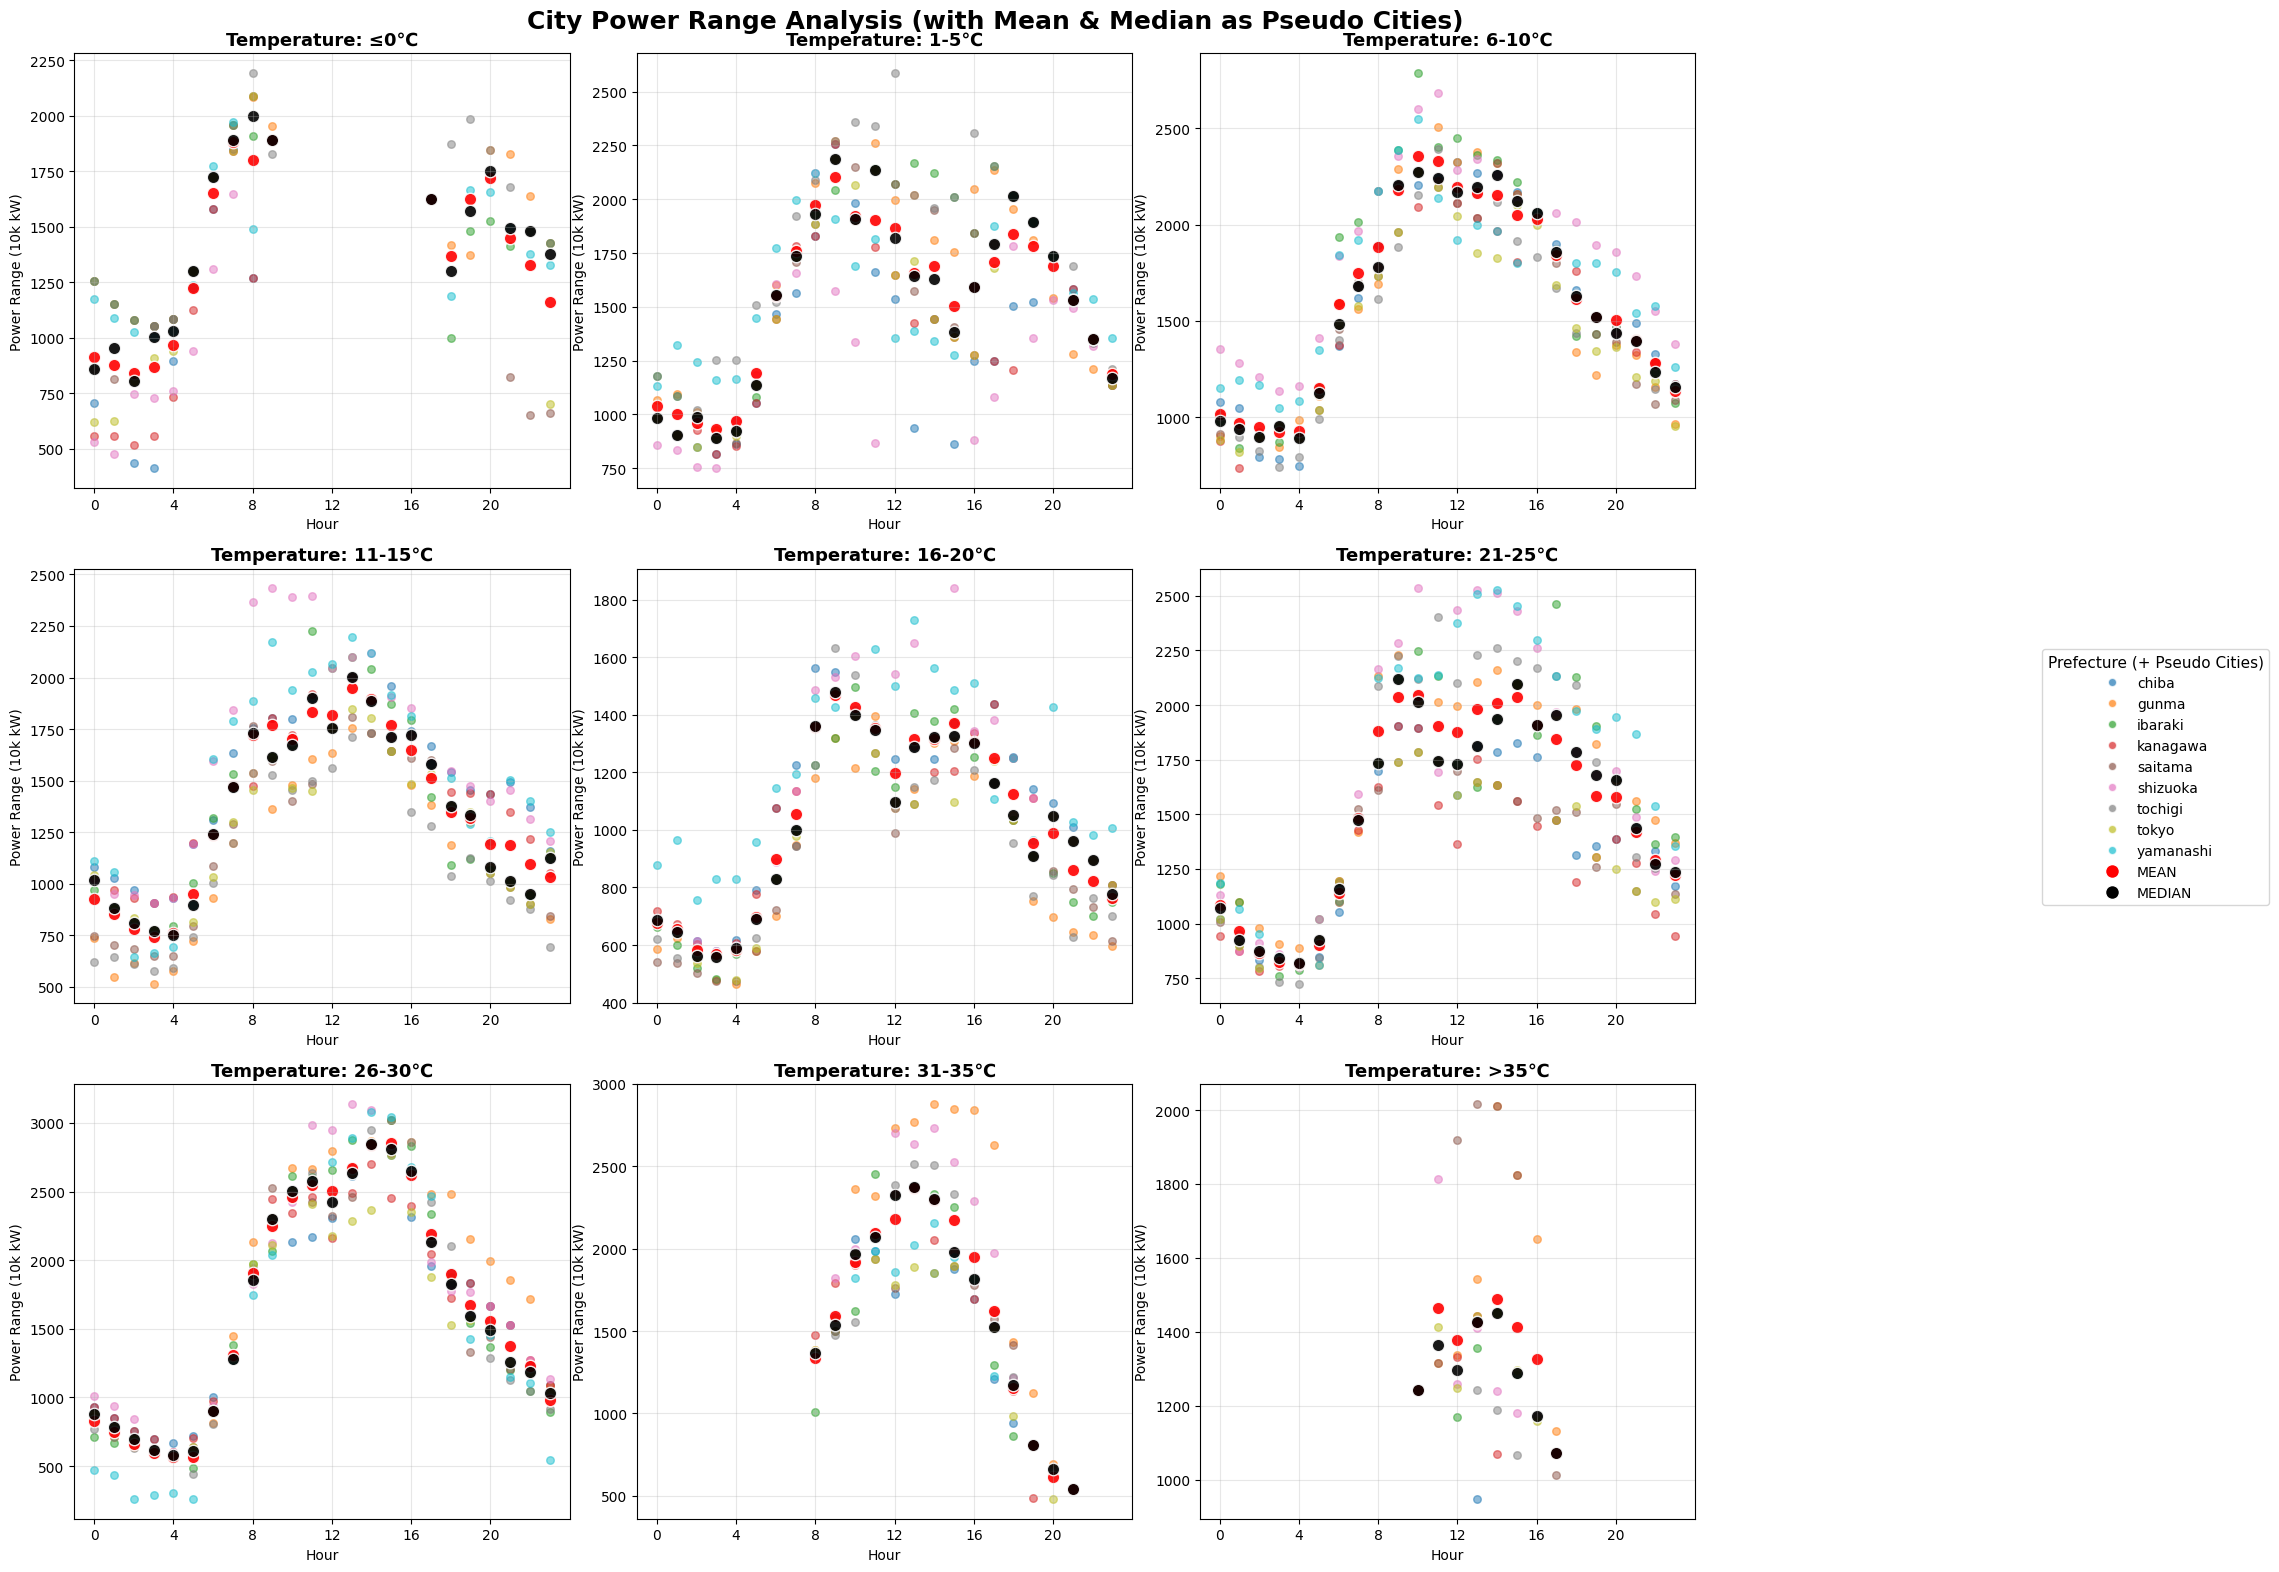

=== Data Summary (with Pseudo Cities) ===
Real prefectures: 9
Pseudo cities: MEAN, MEDIAN
Total combinations: 1907
PDF saved to: C:\Users\tetsu\dev\energy-env\src\notebooks\exploration\city_hourly_temp_power_range_with_pseudo_cities.pdf


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み
df = pd.read_csv(r'C:\Users\tetsu\dev\energy-env\data\exploration\city_hourly_temp_power_range_analysis.csv', encoding='utf-8')

# 温度ランクの順序を定義
temp_rank_order = ['≤0℃', '1-5℃', '6-10℃', '11-15℃', '16-20℃', '21-25℃', '26-30℃', '31-35℃', '>35℃']

# 平均と中央値用のデータフレームを作成
mean_df = df.groupby(['hour', 'temp_rank'])['power_range'].mean().reset_index()
mean_df['prefecture'] = 'MEAN'

median_df = df.groupby(['hour', 'temp_rank'])['power_range'].median().reset_index()
median_df['prefecture'] = 'MEDIAN'

# 元データと疑似都市データを結合
extended_df = pd.concat([df, mean_df, median_df], ignore_index=True)

# 都県の色分け設定（疑似都市を含む）
prefectures = sorted([p for p in extended_df['prefecture'].unique() if p not in ['MEAN', 'MEDIAN']])
all_prefectures = prefectures + ['MEAN', 'MEDIAN']

# 色設定：実都市は通常色、疑似都市は特別色
colors = plt.cm.tab10(np.linspace(0, 1, len(prefectures)))
special_colors = ['red', 'black']  # MEAN=赤、MEDIAN=黒
all_colors = list(colors) + special_colors
color_map = dict(zip(all_prefectures, all_colors))

# マーカー設定：実都市は小さい点、疑似都市は大きい点
marker_sizes = {p: 30 for p in prefectures}
marker_sizes.update({'MEAN': 80, 'MEDIAN': 80})

# 図の設定
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('City Power Range Analysis (with Mean & Median as Pseudo Cities)', fontsize=18, fontweight='bold')

# 各温度ランクごとにサブプロット作成
for i, temp_rank in enumerate(temp_rank_order):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # 該当温度ランクのデータを抽出
    temp_data = extended_df[extended_df['temp_rank'] == temp_rank]
    
    if len(temp_data) > 0:
        # 実都市を先にプロット（背景）
        for prefecture in prefectures:
            pref_data = temp_data[temp_data['prefecture'] == prefecture]
            if len(pref_data) > 0:
                ax.scatter(pref_data['hour'], pref_data['power_range'], 
                          color=color_map[prefecture], label=prefecture, 
                          alpha=0.5, s=marker_sizes[prefecture])
        
        # 疑似都市を後にプロット（前景、目立つように）
        for pseudo_city in ['MEAN', 'MEDIAN']:
            pseudo_data = temp_data[temp_data['prefecture'] == pseudo_city]
            if len(pseudo_data) > 0:
                ax.scatter(pseudo_data['hour'], pseudo_data['power_range'], 
                          color=color_map[pseudo_city], label=pseudo_city, 
                          alpha=0.9, s=marker_sizes[pseudo_city], 
                          edgecolor='white', linewidth=1)
    
    # 各サブプロットの設定
    ax.set_title(f'Temperature: {temp_rank}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Power Range (10k kW)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, 24)
    ax.set_xticks(range(0, 24, 4))

# 全体の凡例を図の右側に配置
handles, labels = [], []
# 実都市
for pref in prefectures:
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[pref], markersize=6, alpha=0.7))
    labels.append(pref)
# 疑似都市（特別扱い）
for pseudo in ['MEAN', 'MEDIAN']:
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[pseudo], markersize=10, markeredgecolor='white'))
    labels.append(pseudo)

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), 
          title='Prefecture (+ Pseudo Cities)', fontsize=10, title_fontsize=11)

# レイアウト調整
plt.tight_layout()
plt.subplots_adjust(right=0.85)

# PDF保存
pdf_path = r'C:\Users\tetsu\dev\energy-env\src\notebooks\exploration\city_hourly_temp_power_range_with_pseudo_cities.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

plt.show()

# データ概要の表示
print("=== Data Summary (with Pseudo Cities) ===")
print(f"Real prefectures: {len(prefectures)}")
print(f"Pseudo cities: MEAN, MEDIAN")
print(f"Total combinations: {len(extended_df)}")
print(f"PDF saved to: {pdf_path}")

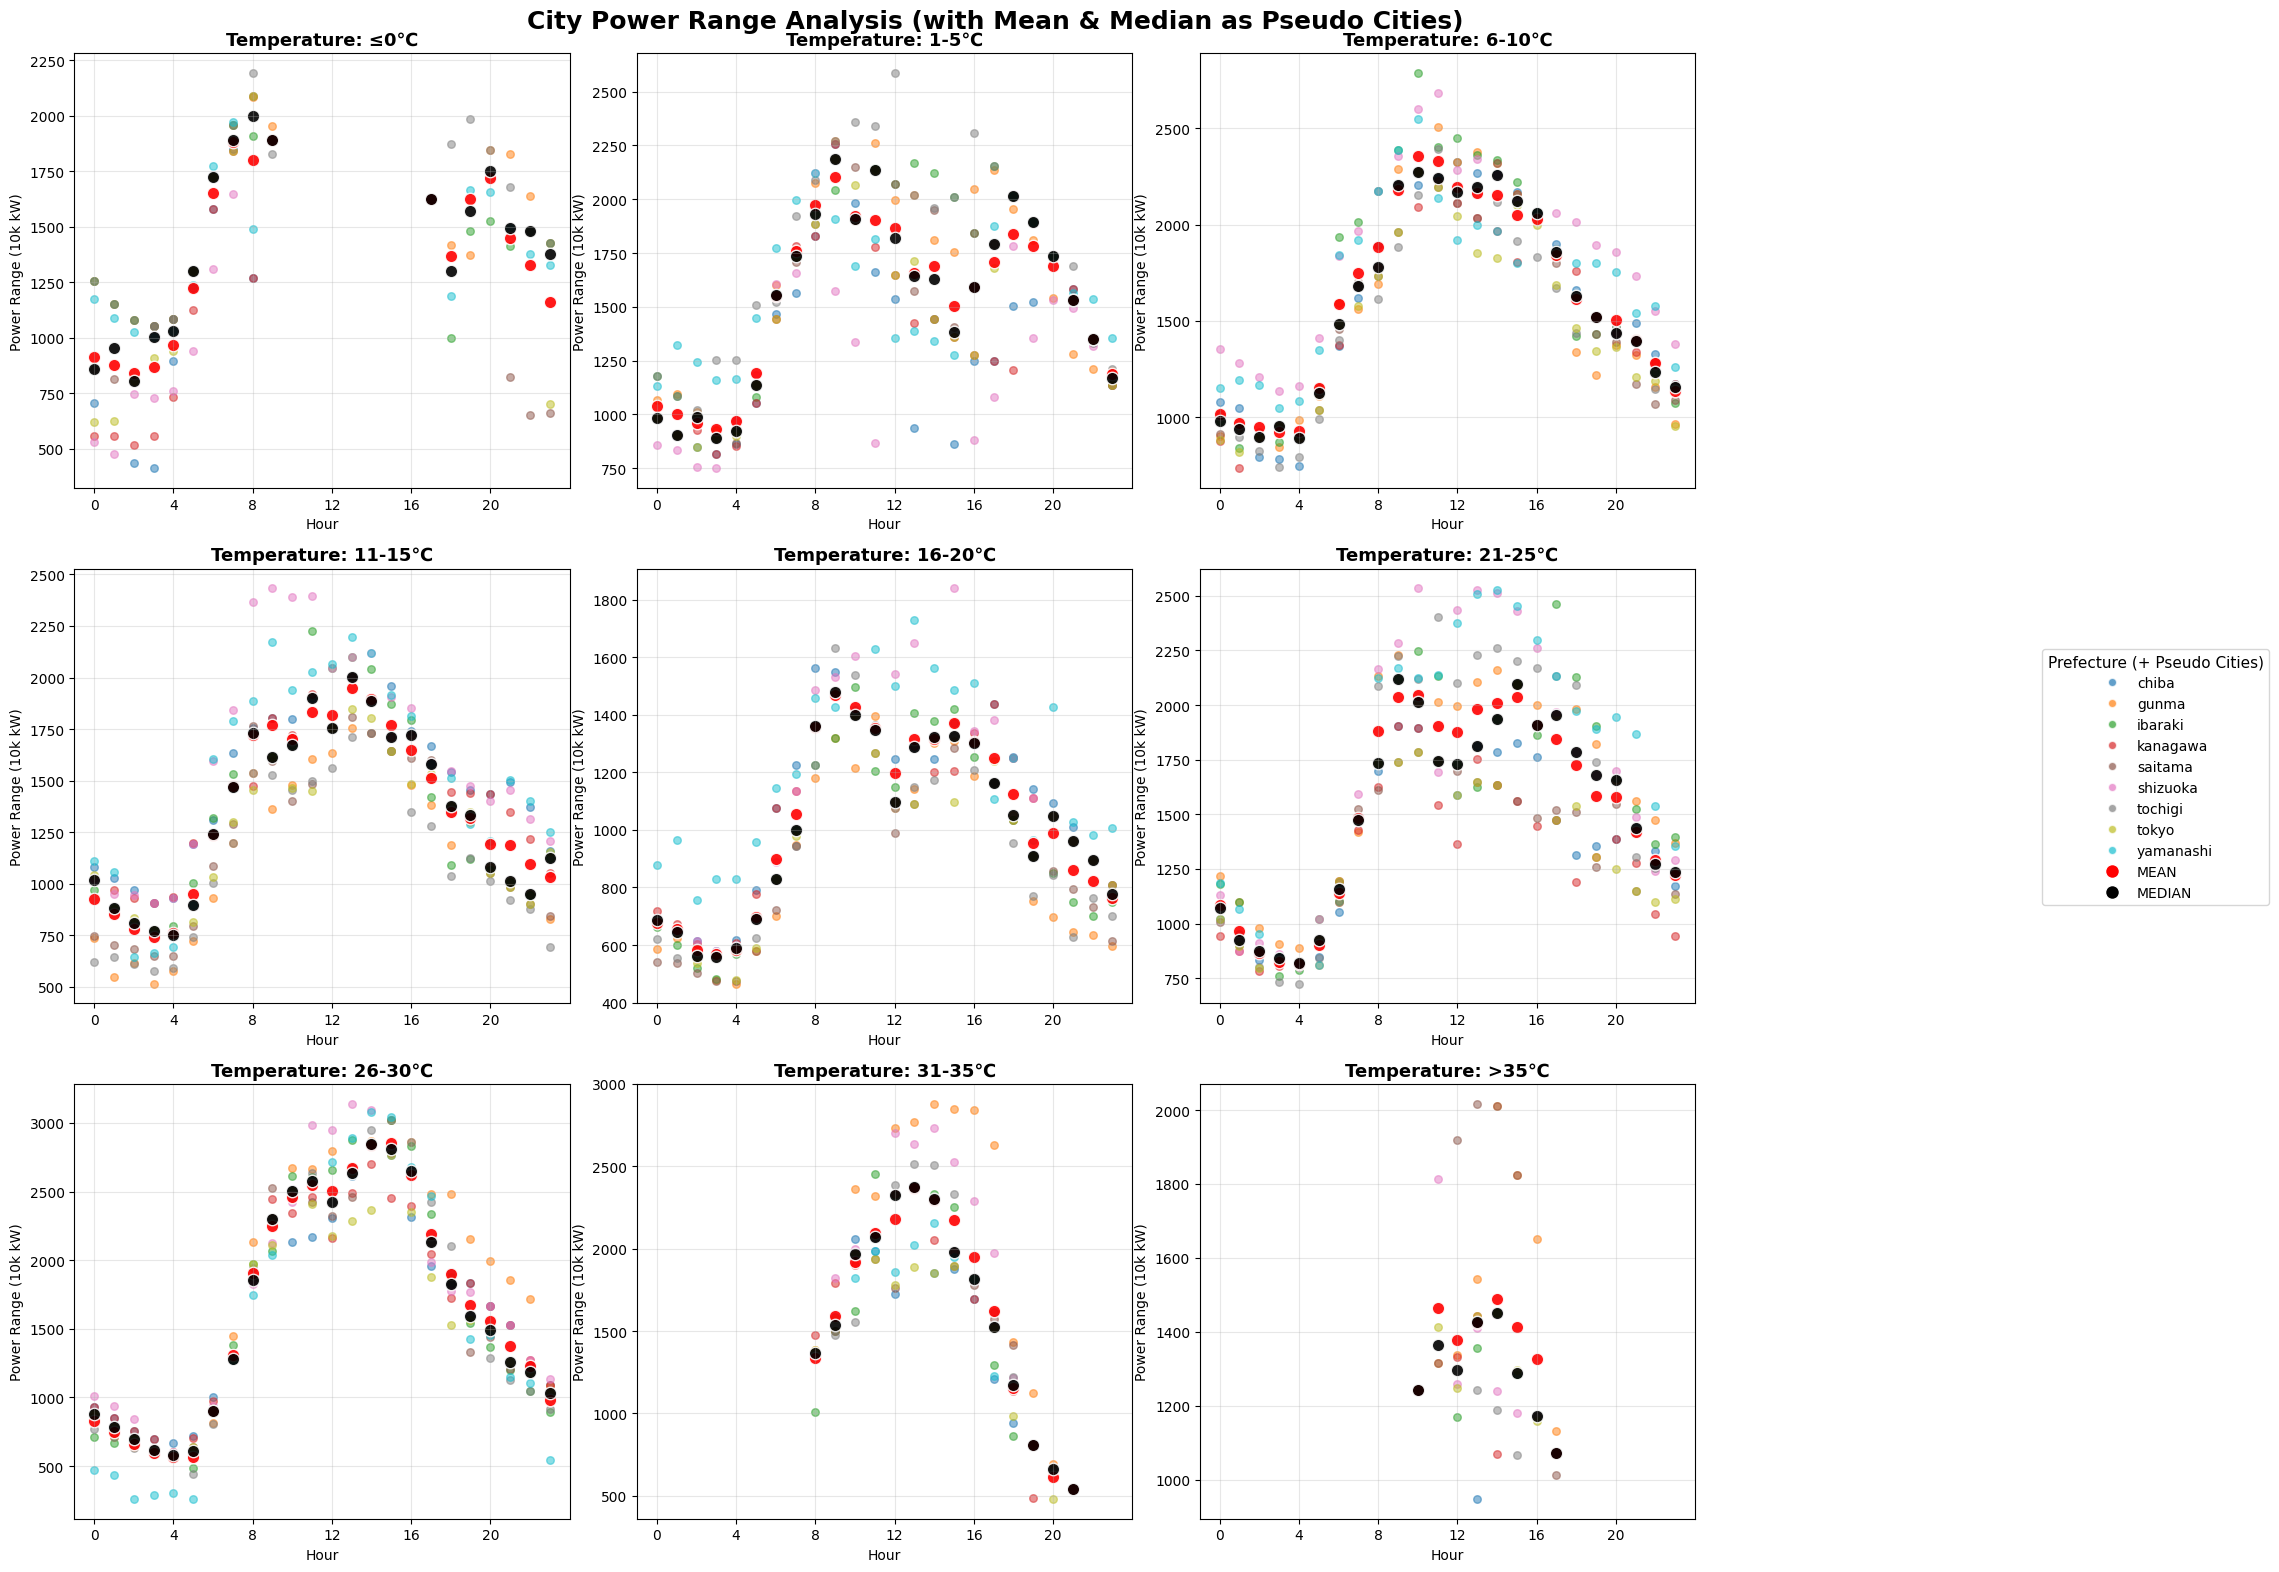

=== Data Summary (with Pseudo Cities) ===
Real prefectures: 9
Pseudo cities: MEAN, MEDIAN
Total combinations: 1907
PDF saved to: C:\Users\tetsu\dev\energy-env\src\notebooks\exploration\city_hourly_temp_power_range_with_pseudo_cities.pdf


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み
df = pd.read_csv(r'C:\Users\tetsu\dev\energy-env\data\exploration\city_hourly_temp_power_range_analysis.csv', encoding='utf-8')

# 温度ランクの順序を定義
temp_rank_order = ['≤0℃', '1-5℃', '6-10℃', '11-15℃', '16-20℃', '21-25℃', '26-30℃', '31-35℃', '>35℃']

# 平均と中央値用のデータフレームを作成
mean_df = df.groupby(['hour', 'temp_rank'])['power_range'].mean().reset_index()
mean_df['prefecture'] = 'MEAN'

median_df = df.groupby(['hour', 'temp_rank'])['power_range'].median().reset_index()
median_df['prefecture'] = 'MEDIAN'

# 元データと疑似都市データを結合
extended_df = pd.concat([df, mean_df, median_df], ignore_index=True)

# 都県の色分け設定（疑似都市を含む）
prefectures = sorted([p for p in extended_df['prefecture'].unique() if p not in ['MEAN', 'MEDIAN']])
all_prefectures = prefectures + ['MEAN', 'MEDIAN']

# 色設定：実都市は通常色、疑似都市は特別色
colors = plt.cm.tab10(np.linspace(0, 1, len(prefectures)))
special_colors = ['red', 'black']  # MEAN=赤、MEDIAN=黒
all_colors = list(colors) + special_colors
color_map = dict(zip(all_prefectures, all_colors))

# マーカー設定：実都市は小さい点、疑似都市は大きい点
marker_sizes = {p: 30 for p in prefectures}
marker_sizes.update({'MEAN': 80, 'MEDIAN': 80})

# 図の設定
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('City Power Range Analysis (with Mean & Median as Pseudo Cities)', fontsize=18, fontweight='bold')

# 各温度ランクごとにサブプロット作成
for i, temp_rank in enumerate(temp_rank_order):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # 該当温度ランクのデータを抽出
    temp_data = extended_df[extended_df['temp_rank'] == temp_rank]
    
    if len(temp_data) > 0:
        # 実都市を先にプロット（背景）
        for prefecture in prefectures:
            pref_data = temp_data[temp_data['prefecture'] == prefecture]
            if len(pref_data) > 0:
                ax.scatter(pref_data['hour'], pref_data['power_range'], 
                          color=color_map[prefecture], label=prefecture, 
                          alpha=0.5, s=marker_sizes[prefecture])
        
        # 疑似都市を後にプロット（前景、目立つように）
        for pseudo_city in ['MEAN', 'MEDIAN']:
            pseudo_data = temp_data[temp_data['prefecture'] == pseudo_city]
            if len(pseudo_data) > 0:
                ax.scatter(pseudo_data['hour'], pseudo_data['power_range'], 
                          color=color_map[pseudo_city], label=pseudo_city, 
                          alpha=0.9, s=marker_sizes[pseudo_city], 
                          edgecolor='white', linewidth=1)
    
    # 各サブプロットの設定
    ax.set_title(f'Temperature: {temp_rank}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Power Range (10k kW)')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, 24)
    ax.set_xticks(range(0, 24, 4))

# 全体の凡例を図の右側に配置
handles, labels = [], []
# 実都市
for pref in prefectures:
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[pref], markersize=6, alpha=0.7))
    labels.append(pref)
# 疑似都市（特別扱い）
for pseudo in ['MEAN', 'MEDIAN']:
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[pseudo], markersize=10, markeredgecolor='white'))
    labels.append(pseudo)

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), 
          title='Prefecture (+ Pseudo Cities)', fontsize=10, title_fontsize=11)

# レイアウト調整
plt.tight_layout()
plt.subplots_adjust(right=0.85)

# PDF保存
pdf_path = r'C:\Users\tetsu\dev\energy-env\src\notebooks\exploration\city_hourly_temp_power_range_with_pseudo_cities.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

plt.show()

# データ概要の表示
print("=== Data Summary (with Pseudo Cities) ===")
print(f"Real prefectures: {len(prefectures)}")
print(f"Pseudo cities: MEAN, MEDIAN")
print(f"Total combinations: {len(extended_df)}")
print(f"PDF saved to: {pdf_path}")

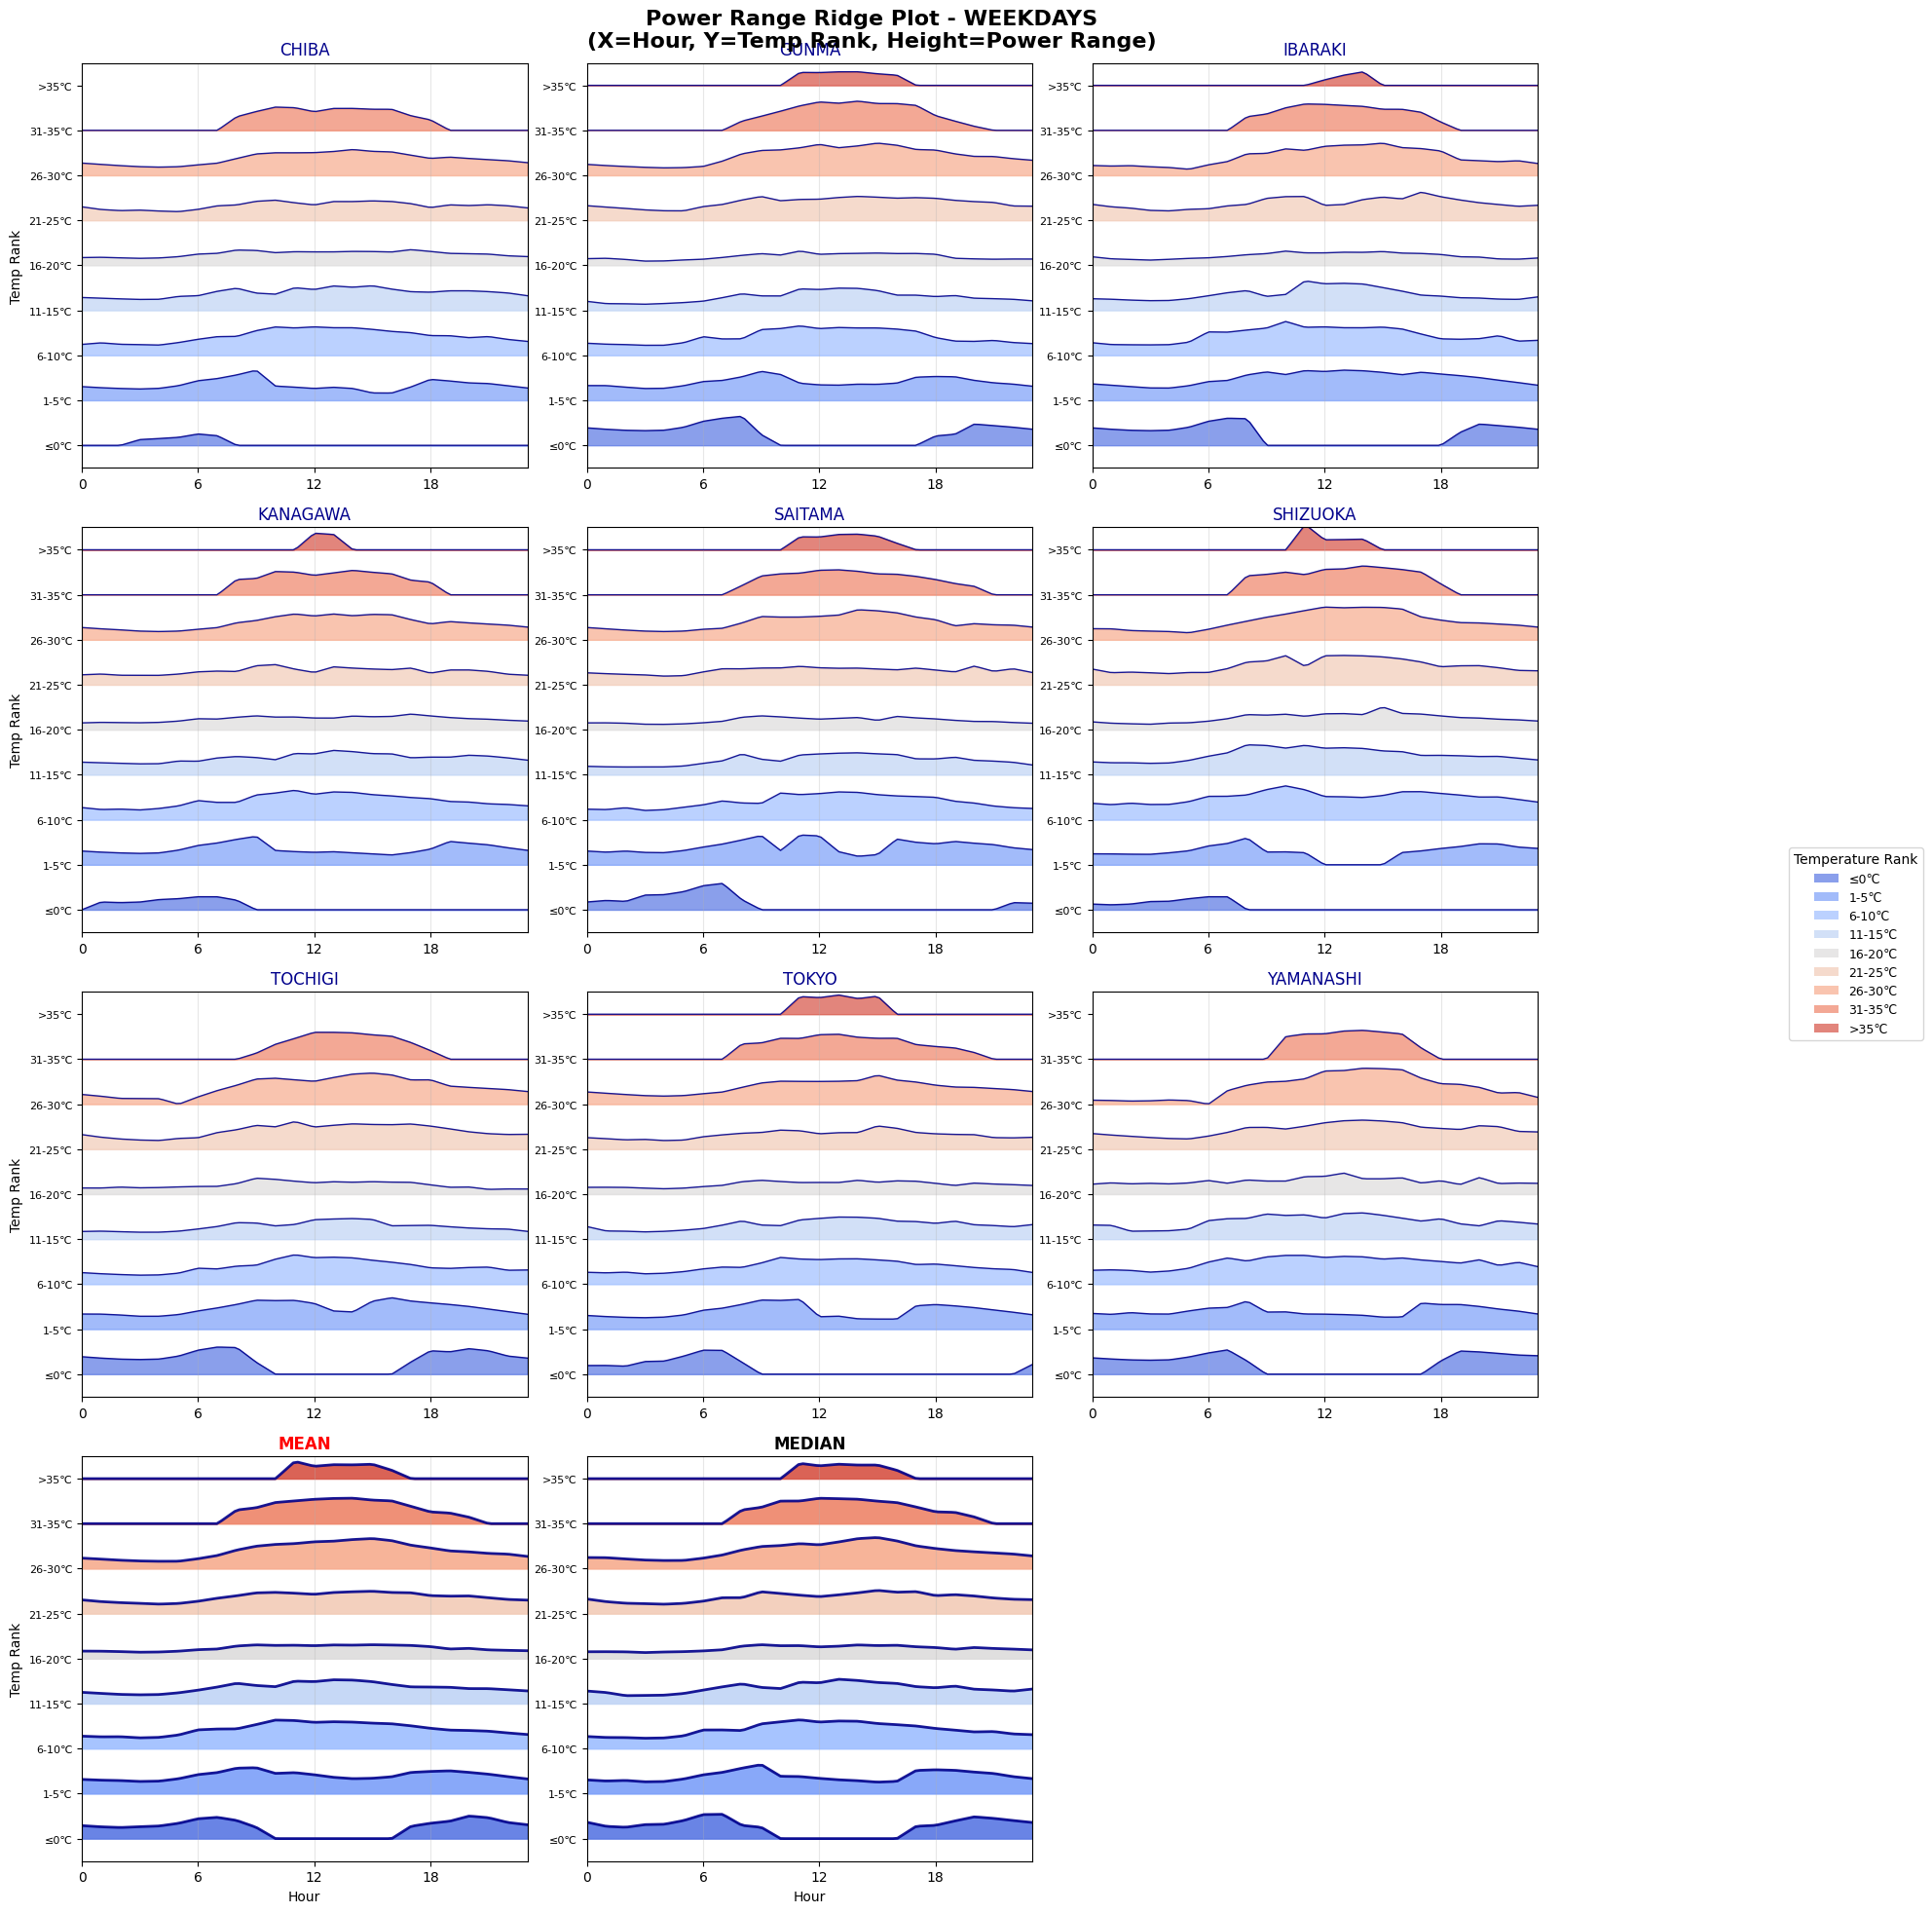

PDF saved: C:\Users\tetsu\dev\energy-env\src\notebooks\exploration\power_range_ridge_weekdays.pdf


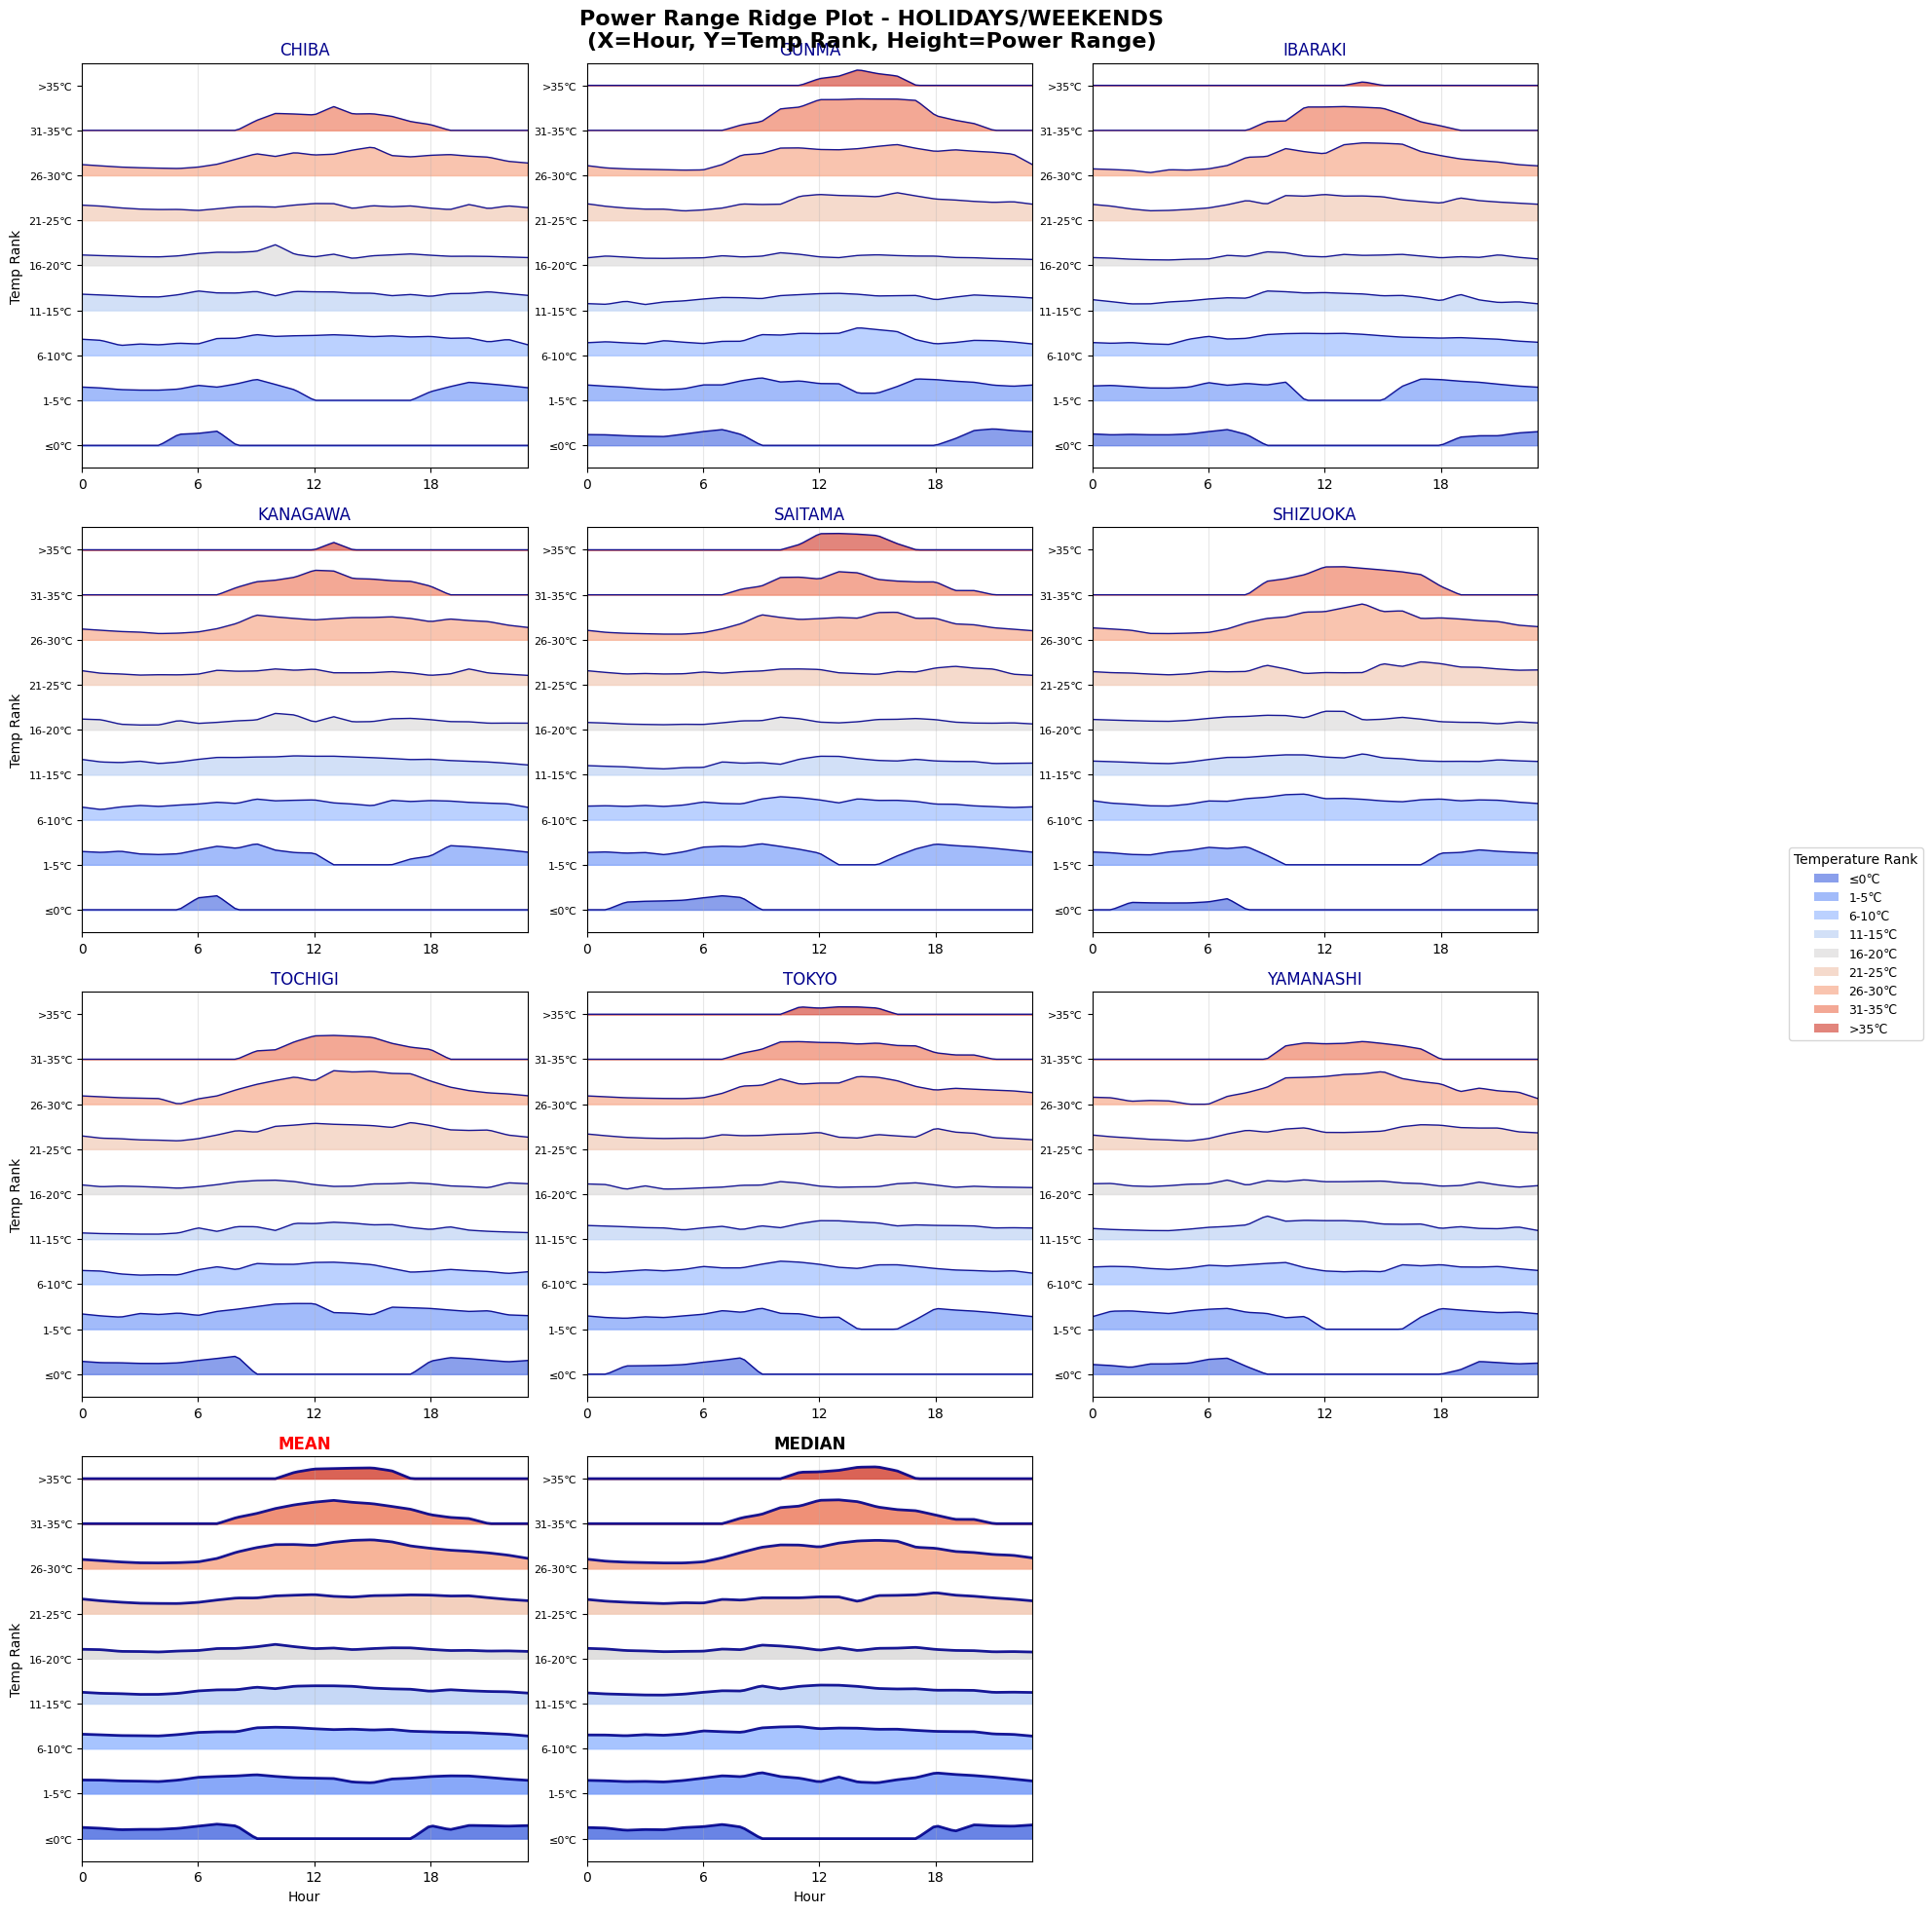

PDF saved: C:\Users\tetsu\dev\energy-env\src\notebooks\exploration\power_range_ridge_holidays.pdf

=== Analysis Complete ===
Generated 2 PDFs:
1. power_range_ridge_weekdays.pdf
2. power_range_ridge_holidays.pdf


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# データ読み込み
df = pd.read_csv(r'C:\Users\tetsu\dev\energy-env\data\exploration\city_hourly_temp_power_range_weekday_holiday.csv', encoding='utf-8')

# 温度ランクの順序を定義
temp_rank_order = ['≤0℃', '1-5℃', '6-10℃', '11-15℃', '16-20℃', '21-25℃', '26-30℃', '31-35℃', '>35℃']

# 平日・休日別にデータを分離
weekday_df = df[df['day_type'] == 'Weekday'].copy()
holiday_df = df[df['day_type'] == 'Holiday/Weekend'].copy()

# 各データセットについて平均・中央値を追加する関数
def add_pseudo_cities(data_df):
    if len(data_df) == 0:
        return data_df
    
    mean_df = data_df.groupby(['hour', 'temp_rank'])['power_range'].mean().reset_index()
    mean_df['prefecture'] = 'MEAN'
    mean_df['day_type'] = data_df['day_type'].iloc[0]
    
    median_df = data_df.groupby(['hour', 'temp_rank'])['power_range'].median().reset_index()
    median_df['prefecture'] = 'MEDIAN'
    median_df['day_type'] = data_df['day_type'].iloc[0]
    
    # 他の列をダミー値で追加
    for col in ['record_count', 'min_power', 'max_power', 'avg_power', 'stddev_power']:
        if col in data_df.columns:
            mean_df[col] = 0
            median_df[col] = 0
    
    return pd.concat([data_df, mean_df, median_df], ignore_index=True)

# 平日・休日それぞれに疑似都市を追加
weekday_extended = add_pseudo_cities(weekday_df)
holiday_extended = add_pseudo_cities(holiday_df)

# Ridge Plot作成関数
def create_ridge_plot(data_df, title, pdf_filename):
    # 都市リストを取得
    real_prefectures = sorted([p for p in data_df['prefecture'].unique() if p not in ['MEAN', 'MEDIAN']])
    pseudo_prefectures = ['MEAN', 'MEDIAN']
    all_prefectures = real_prefectures + pseudo_prefectures
    
    # 図の設定（4×3のサブプロット）
    fig, axes = plt.subplots(4, 3, figsize=(18, 20))
    fig.suptitle(f'Power Range Ridge Plot - {title}\n(X=Hour, Y=Temp Rank, Height=Power Range)', 
                 fontsize=16, fontweight='bold')
    
    # カラーマップ設定
    colors = plt.cm.coolwarm(np.linspace(0.1, 0.9, len(temp_rank_order)))
    temp_color_map = dict(zip(temp_rank_order, colors))
    
    # 各都市ごとにサブプロット作成
    for pref_idx, prefecture in enumerate(all_prefectures):
        row = pref_idx // 3
        col = pref_idx % 3
        ax = axes[row, col]
        
        # Y軸位置設定
        y_positions = np.arange(len(temp_rank_order))
        ridge_height = 0.8
        
        # 各温度ランクごとにridgeを作成
        for i, temp_rank in enumerate(temp_rank_order):
            y_base = y_positions[i]
            
            # 該当都市×温度ランクのデータを抽出
            temp_data = data_df[(data_df['prefecture'] == prefecture) & 
                               (data_df['temp_rank'] == temp_rank)]
            
            if len(temp_data) > 0:
                # 時間ごとに電力レンジの分布を作成
                x_points = []
                y_points = []
                
                for hour in range(24):
                    hour_data = temp_data[temp_data['hour'] == hour]['power_range']
                    if len(hour_data) > 0:
                        height = hour_data.iloc[0]
                        # 正規化
                        max_range = data_df['power_range'].max()
                        height_normalized = (height / max_range) * ridge_height
                        
                        x_points.append(hour)
                        y_points.append(y_base + height_normalized)
                    else:
                        x_points.append(hour)
                        y_points.append(y_base)
                
                # 滑らかな曲線作成
                if len(x_points) > 1:
                    x_smooth = np.linspace(0, 23, 100)
                    y_smooth = np.interp(x_smooth, x_points, y_points)
                    
                    # Ridge plot描画
                    line_width = 2 if prefecture in pseudo_prefectures else 1
                    alpha_fill = 0.9 if prefecture in pseudo_prefectures else 0.7
                    
                    ax.fill_between(x_smooth, y_base, y_smooth, 
                                   alpha=alpha_fill, color=temp_color_map[temp_rank])
                    ax.plot(x_smooth, y_smooth, 
                           color='darkblue', alpha=0.9, linewidth=line_width)
        
        # サブプロット設定
        ax.set_yticks(y_positions)
        ax.set_yticklabels(temp_rank_order, fontsize=8)
        ax.set_xlim(0, 23)
        ax.set_ylim(-0.5, len(temp_rank_order) - 0.5)
        ax.grid(True, axis='x', alpha=0.3)
        
        # タイトル設定
        title_color = 'red' if prefecture == 'MEAN' else ('black' if prefecture == 'MEDIAN' else 'darkblue')
        font_weight = 'bold' if prefecture in pseudo_prefectures else 'normal'
        ax.set_title(f'{prefecture.upper()}', fontsize=12, fontweight=font_weight, color=title_color)
        
        ax.set_xticks(range(0, 24, 6))
        
        # 最下段にX軸ラベル
        if row == 3:
            ax.set_xlabel('Hour', fontsize=10)
        
        # 左端にY軸ラベル
        if col == 0:
            ax.set_ylabel('Temp Rank', fontsize=10)
    
    # 空白セルを非表示
    if len(all_prefectures) < 12:
        for empty_idx in range(len(all_prefectures), 12):
            empty_row = empty_idx // 3
            empty_col = empty_idx % 3
            axes[empty_row, empty_col].set_visible(False)
    
    # 凡例
    temp_handles = []
    temp_labels = []
    for temp_rank in temp_rank_order:
        temp_handles.append(plt.Rectangle((0,0),1,1, facecolor=temp_color_map[temp_rank], alpha=0.7))
        temp_labels.append(temp_rank)
    
    fig.legend(temp_handles, temp_labels, loc='center left', bbox_to_anchor=(1.02, 0.5), 
              title='Temperature Rank', fontsize=9, title_fontsize=10)
    
    # レイアウト調整
    plt.tight_layout()
    plt.subplots_adjust(right=0.88)
    
    # PDF保存
    pdf_path = f'C:\\Users\\tetsu\\dev\\energy-env\\src\\notebooks\\exploration\\{pdf_filename}'
    with PdfPages(pdf_path) as pdf:
        pdf.savefig(fig, bbox_inches='tight')
    
    plt.show()
    print(f"PDF saved: {pdf_path}")

# 平日版作成
if len(weekday_extended) > 0:
    create_ridge_plot(weekday_extended, "WEEKDAYS", "power_range_ridge_weekdays.pdf")
else:
    print("平日データが見つかりません")

# 休日版作成
if len(holiday_extended) > 0:
    create_ridge_plot(holiday_extended, "HOLIDAYS/WEEKENDS", "power_range_ridge_holidays.pdf")
else:
    print("休日データが見つかりません")

print("\n=== Analysis Complete ===")
print("Generated 2 PDFs:")
print("1. power_range_ridge_weekdays.pdf")
print("2. power_range_ridge_holidays.pdf")

Found 9 CSV files
chiba: 21984 records
gunma: 21984 records
ibaraki: 21984 records
kanagawa: 21984 records
saitama: 21984 records
shizuoka: 21984 records
tochigi: 21984 records
tokyo: 21984 records
yamanashi: 21984 records

Total humidity records: 197856
Humidity range: 10.0 - 100.0%


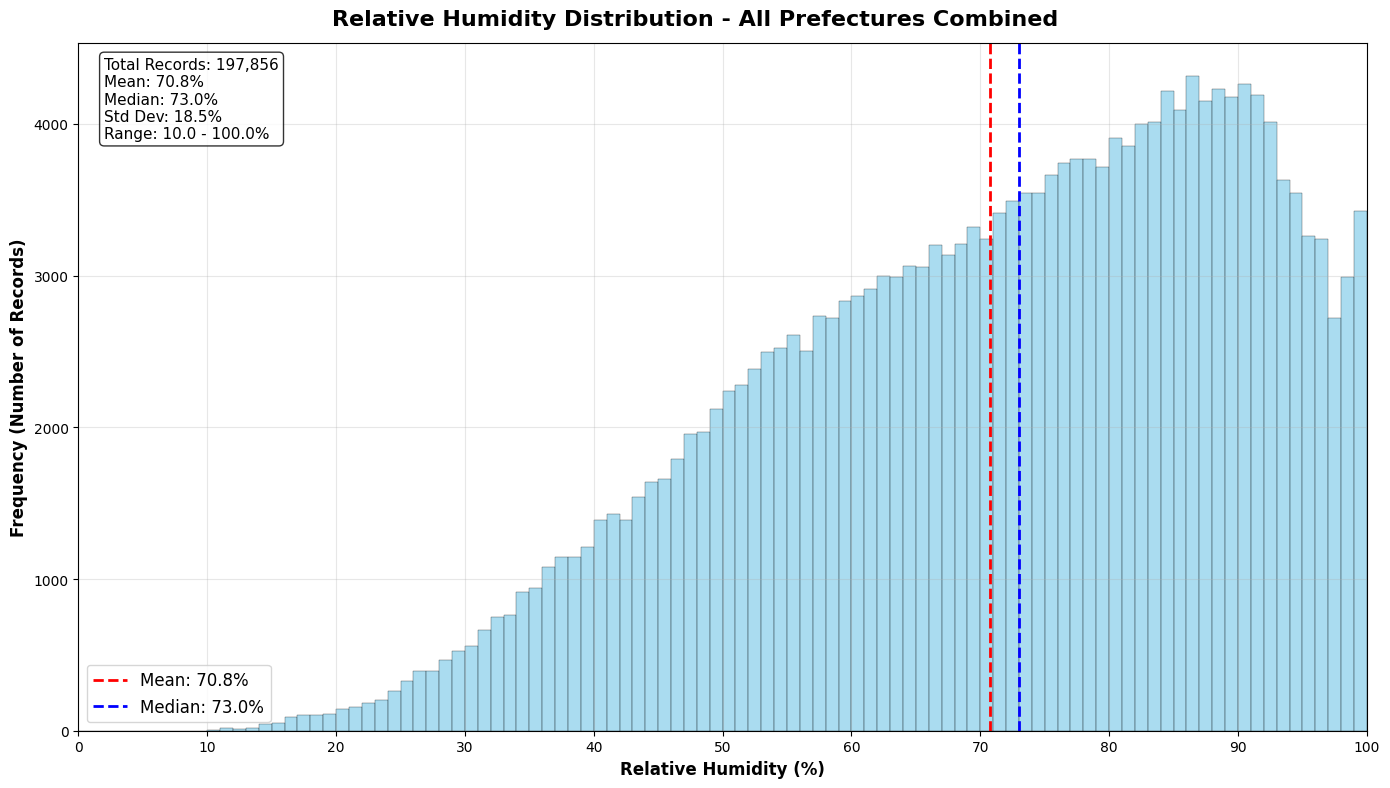


=== Detailed Statistics ===
Total records: 197,856
Mean: 70.79%
Median: 73.00%
Standard deviation: 18.51%
Min: 10.0%
Max: 100.0%

Percentiles (20%, 40%, 60%, 80%):
20th: 54.0%
40th: 67.0%
60th: 79.0%
80th: 88.0%

=== Suggested Humidity Classes (5 classes) ===
1. Very Dry: < 54%
2. Dry: 54-67%
3. Moderate: 67-79%
4. Humid: 79-88%
5. Very Humid: > 88%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# データディレクトリ
data_dir = r'C:\Users\tetsu\dev\energy-env\data\exploration'

# 都市別CSVファイルを取得
csv_files = glob.glob(f'{data_dir}/*_power_weather.csv')
print(f"Found {len(csv_files)} CSV files")

# 全都市の湿度データを統合
all_humidity_values = []

for csv_file in csv_files:
    city_name = csv_file.split('\\')[-1].replace('_power_weather.csv', '')
    
    try:
        df = pd.read_csv(csv_file)
        humidity_data = df['relative_humidity_2m'].dropna()
        all_humidity_values.extend(humidity_data.values)
        print(f"{city_name}: {len(humidity_data)} records")
        
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

# 統合データをnumpy配列に変換
all_humidity_values = np.array(all_humidity_values)

print(f"\nTotal humidity records: {len(all_humidity_values)}")
print(f"Humidity range: {all_humidity_values.min():.1f} - {all_humidity_values.max():.1f}%")

# 図の設定
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Relative Humidity Distribution - All Prefectures Combined', 
             fontsize=16, fontweight='bold')

# ヒストグラム作成（ビンを0-100の100個に設定）
bins = np.arange(0, 101, 1)  # 0から100まで1単位刻み
counts, bin_edges, patches = ax.hist(all_humidity_values, bins=bins, 
                                   alpha=0.7, edgecolor='black', linewidth=0.3,
                                   color='skyblue')

# 統計情報
mean_humidity = all_humidity_values.mean()
median_humidity = np.median(all_humidity_values)
std_humidity = all_humidity_values.std()

# 統計線を追加
ax.axvline(mean_humidity, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_humidity:.1f}%')
ax.axvline(median_humidity, color='blue', linestyle='--', linewidth=2, 
           label=f'Median: {median_humidity:.1f}%')

# 軸設定（X軸を0-100、10単位刻みで表示）
ax.set_xlabel('Relative Humidity (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency (Number of Records)', fontsize=12, fontweight='bold')
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 10))  # 0, 10, 20, ..., 100
ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

# 統計情報をテキストで表示
stats_text = f'Total Records: {len(all_humidity_values):,}\n'
stats_text += f'Mean: {mean_humidity:.1f}%\n'
stats_text += f'Median: {median_humidity:.1f}%\n'
stats_text += f'Std Dev: {std_humidity:.1f}%\n'
stats_text += f'Range: {all_humidity_values.min():.1f} - {all_humidity_values.max():.1f}%'

ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# 詳細統計とクラス提案
print("\n=== Detailed Statistics ===")
print(f"Total records: {len(all_humidity_values):,}")
print(f"Mean: {mean_humidity:.2f}%")
print(f"Median: {median_humidity:.2f}%")
print(f"Standard deviation: {std_humidity:.2f}%")
print(f"Min: {all_humidity_values.min():.1f}%")
print(f"Max: {all_humidity_values.max():.1f}%")

# パーセンタイル分析
percentiles = np.percentile(all_humidity_values, [20, 40, 60, 80])
print(f"\nPercentiles (20%, 40%, 60%, 80%):")
print(f"20th: {percentiles[0]:.1f}%")
print(f"40th: {percentiles[1]:.1f}%")
print(f"60th: {percentiles[2]:.1f}%")
print(f"80th: {percentiles[3]:.1f}%")

# 湿度クラス提案（5クラス）
print("\n=== Suggested Humidity Classes (5 classes) ===")
print(f"1. Very Dry: < {percentiles[0]:.0f}%")
print(f"2. Dry: {percentiles[0]:.0f}-{percentiles[1]:.0f}%")
print(f"3. Moderate: {percentiles[1]:.0f}-{percentiles[2]:.0f}%")
print(f"4. Humid: {percentiles[2]:.0f}-{percentiles[3]:.0f}%")
print(f"5. Very Humid: > {percentiles[3]:.0f}%")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.backends.backend_pdf import PdfPages

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# データディレクトリ
data_dir = r'C:\Users\tetsu\dev\energy-env\data\exploration'

# 都市別CSVファイルを取得
csv_files = glob.glob(f'{data_dir}/*_power_weather.csv')
cities = [file.split('\\')[-1].replace('_power_weather.csv', '') for file in csv_files]
cities = sorted(cities)

print(f"Found {len(cities)} cities: {cities}")

# 湿度クラス定義（20刻み5クラス）
def get_humidity_class(humidity):
    if humidity < 20:
        return 'Very Dry (<20%)'
    elif humidity < 40:
        return 'Dry (20-40%)'
    elif humidity < 60:
        return 'Moderate (40-60%)'
    elif humidity < 80:
        return 'Humid (60-80%)'
    else:
        return 'Very Humid (≥80%)'

# 湿度クラスの色設定（明確に区別できる色）
humidity_colors = {
    'Very Dry (<20%)': 'red',        # 赤
    'Dry (20-40%)': 'orange',        # オレンジ
    'Moderate (40-60%)': 'green',    # 緑
    'Humid (60-80%)': 'blue',        # 青
    'Very Humid (≥80%)': 'purple'    # 紫
}

# 気温クラス定義
def get_temp_class(temp):
    if temp <= 0:
        return '≤0℃'
    elif temp <= 5:
        return '1-5℃'
    elif temp <= 10:
        return '6-10℃'
    elif temp <= 15:
        return '11-15℃'
    elif temp <= 20:
        return '16-20℃'
    elif temp <= 25:
        return '21-25℃'
    elif temp <= 30:
        return '26-30℃'
    elif temp <= 35:
        return '31-35℃'
    else:
        return '>35℃'

temp_classes = ['≤0℃', '1-5℃', '6-10℃', '11-15℃', '16-20℃', '21-25℃', '26-30℃', '31-35℃', '>35℃']

# PDF作成
pdf_path = r'C:\Users\tetsu\dev\energy-env\src\notebooks\exploration\humidity_power_analysis_by_city.pdf'

with PdfPages(pdf_path) as pdf:
    for city in cities:
        print(f"Processing {city}...")
        
        # データ読み込み
        csv_file = f'{data_dir}/{city}_power_weather.csv'
        df = pd.read_csv(csv_file)
        
        # 欠損値除去
        df = df.dropna(subset=['actual_power', 'temperature_2m', 'relative_humidity_2m'])
        
        # クラス列追加
        df['humidity_class'] = df['relative_humidity_2m'].apply(get_humidity_class)
        df['temp_class'] = df['temperature_2m'].apply(get_temp_class)
        
        # 平日・休日分離
        weekday_df = df[(df['is_holiday'] == False) & (df['is_weekend'] == False)]
        holiday_df = df[(df['is_holiday'] == True) | (df['is_weekend'] == True)]
        
        # 図の設定（左右2列、各列3×3のサブプロット）
        fig, axes = plt.subplots(3, 6, figsize=(20, 15))
        fig.suptitle(f'{city.upper()} - Power vs Time by Temperature & Humidity Classes', 
                     fontsize=16, fontweight='bold')
        
        # 左側：平日、右側：休日
        datasets = [('WEEKDAYS', weekday_df, axes[:, :3]), 
                   ('HOLIDAYS/WEEKENDS', holiday_df, axes[:, 3:])]
        
        for dataset_name, data, subplot_axes in datasets:
            # 各気温クラスごとにサブプロット作成
            for i, temp_class in enumerate(temp_classes):
                row = i // 3
                col = i % 3
                ax = subplot_axes[row, col]
                
                # 該当気温クラスのデータを抽出
                temp_data = data[data['temp_class'] == temp_class]
                
                if len(temp_data) > 0:
                    # 湿度クラスごとに色分けして散布図作成
                    for humidity_class in humidity_colors.keys():
                        humidity_data = temp_data[temp_data['humidity_class'] == humidity_class]
                        if len(humidity_data) > 0:
                            ax.scatter(humidity_data['hour'], humidity_data['actual_power'],
                                     color=humidity_colors[humidity_class], 
                                     alpha=0.7, s=25, label=humidity_class)
                
                # サブプロット設定
                ax.set_title(f'{temp_class}', fontsize=10, fontweight='bold')
                ax.set_xlim(0, 23)
                ax.set_xticks(range(0, 24, 6))
                ax.grid(True, alpha=0.3)
                
                # 最下段にX軸ラベル
                if row == 2:
                    ax.set_xlabel('Hour')
                
                # 左端にY軸ラベル
                if col == 0:
                    ax.set_ylabel('Power (10k kW)')
            
            # 列タイトル追加
            subplot_axes[0, 1].text(0.5, 1.15, dataset_name, 
                                  transform=subplot_axes[0, 1].transAxes,
                                  fontsize=14, fontweight='bold', ha='center')
        
        # 湿度クラス凡例をページ下部に配置
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                    markerfacecolor=color, markersize=10, label=label)
                         for label, color in humidity_colors.items()]
        
        fig.legend(legend_elements, humidity_colors.keys(), 
                  loc='lower center', bbox_to_anchor=(0.5, -0.02), 
                  ncol=5, fontsize=11, title='Humidity Classes (20% intervals)')
        
        # レイアウト調整
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.1)
        
        # PDFに保存
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

print(f"\nPDF saved: {pdf_path}")
print("Generated 9-page PDF with 20%-interval humidity analysis for each city")

Found 9 cities: ['chiba', 'gunma', 'ibaraki', 'kanagawa', 'saitama', 'shizuoka', 'tochigi', 'tokyo', 'yamanashi']
Processing chiba...
Processing gunma...
Processing ibaraki...
Processing kanagawa...
Processing saitama...
Processing shizuoka...
Processing tochigi...
Processing tokyo...
Processing yamanashi...

PDF saved: C:\Users\tetsu\dev\energy-env\src\notebooks\exploration\humidity_power_analysis_by_city.pdf
Generated 9-page PDF with 20%-interval humidity analysis for each city
